# Sentiment Analysis of Yelp Reviews Using RoBERTa-GRU

This Jupyter notebook is part of the GitHub repository at https://github.com/shreyasskasetty-tamu/sentiment_analysis. The repository contains the complete code, dataset, and documentation for the sentiment analysis project, which utilizes a hybrid RoBERTa-GRU model to analyze sentiments expressed in Yelp reviews.

In the notebook, I explore the dataset, build and train our sentiment analysis models, and evaluate their performance. The models are tuned and trained using a comprehensive set of hyperparameters to achieve optimal performance.

To facilitate the computationally intensive training process, I have leveraged the resources provided by the High Performance Research Computing (HPRC) center at TAMU.

For more information and to view the source code, please visit our GitHub repository:
https://github.com/shreyasskasetty-tamu/sentiment_analysis


# Sentiment Analysis on Yelp Review Dataset using Transformer Models

In [1]:
!pip install nlpaug

## Section 1: Data Preprocessing
1. **Remove Punctuation:** Strip the text of all punctuation marks.
2. **Convert to Lowercase:** Transform all text to lowercase for uniformity.
3. **Remove Stopwords:** Eliminate common words that don't contribute significantly to sentiment (e.g., "and", "the", "is"). This can be done using the NLTK library.
4. **Categorize Star Ratings:** Convert the star ratings into three sentiment categories:
    - Positive: Ratings greater than 3.
    - Negative: Ratings less than or equal to 2.
    - Neutral: Ratings exactly equal to 3.

In [48]:
#importing general libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords

In [49]:
# Load the provided sample test set
training_data_file_path = '/content/drive/MyDrive/YelpDataset/yelp_review_train.csv'
test_data_file_path = '/content/drive/MyDrive/YelpDataset/yelp_review_test.csv'
train_data = pd.read_csv(training_data_file_path)
test_data = pd.read_csv(test_data_file_path)

# Display the first few rows of the dataset to understand its structure
train_data.head()

,text,stars
0,Went for lunch and found that my burger was me...,2.0
1,I needed a new tires for my wife's car. They h...,5.0
2,Jim Woltman who works at Goleta Honda is 5 sta...,5.0
3,Been here a few times to get some shrimp. The...,4.0
4,This is one fantastic place to eat whether you...,5.0


### 1. Remove Punctuations
Strip the text of all punctuation marks.

In [50]:
import regex as re

def remove_punctuation(text: str) -> str:
    """
    Remove punctuation from the given text.

    Args:
    text (str): The text to be processed.

    Returns:
    str: The text with punctuation removed.
    """
    return re.sub(r'[^\w\s]', '', text)

# Apply the remove_punctuation function to the text column
test_data['text_no_punctuation'] = test_data['text'].apply(remove_punctuation)
train_data['text_no_punctuation'] = train_data['text'].apply(remove_punctuation)

# Display the first few rows of the dataset to see the changes
train_data.head()

,text,stars,text_no_punctuation
0,Went for lunch and found that my burger was me...,2.0,Went for lunch and found that my burger was me...
1,I needed a new tires for my wife's car. They h...,5.0,I needed a new tires for my wifes car They had...
2,Jim Woltman who works at Goleta Honda is 5 sta...,5.0,Jim Woltman who works at Goleta Honda is 5 sta...
3,Been here a few times to get some shrimp. The...,4.0,Been here a few times to get some shrimp They...
4,This is one fantastic place to eat whether you...,5.0,This is one fantastic place to eat whether you...


### 2. Convert to Lowercase
Transform all text to lowercase for uniformity.

In [51]:
def convert_to_lowercase(text: str) -> str:
    """
    Convert all characters in the given text to lowercase.

    Args:
    text (str): The text to be processed.

    Returns:
    str: The text in lowercase.
    """
    return text.lower()

# Apply the convert_to_lowercase function to the text_no_punctuation column
test_data['text_lowercase'] = test_data['text_no_punctuation'].apply(convert_to_lowercase)
train_data['text_lowercase'] = train_data['text_no_punctuation'].apply(convert_to_lowercase)

# Display the first few rows of the dataset to see the changes
train_data.head()

,text,stars,text_no_punctuation,text_lowercase
0,Went for lunch and found that my burger was me...,2.0,Went for lunch and found that my burger was me...,went for lunch and found that my burger was me...
1,I needed a new tires for my wife's car. They h...,5.0,I needed a new tires for my wifes car They had...,i needed a new tires for my wifes car they had...
2,Jim Woltman who works at Goleta Honda is 5 sta...,5.0,Jim Woltman who works at Goleta Honda is 5 sta...,jim woltman who works at goleta honda is 5 sta...
3,Been here a few times to get some shrimp. The...,4.0,Been here a few times to get some shrimp They...,been here a few times to get some shrimp they...
4,This is one fantastic place to eat whether you...,5.0,This is one fantastic place to eat whether you...,this is one fantastic place to eat whether you...


### 3. Remove Stopwords
Eliminate common words that don't contribute significantly to sentiment (e.g., "and", "the", "is") using the NLTK library.

In [52]:
# Downlaod stop words in English Language.
nltk.download('stopwords')
print(stopwords.words('english'))
english_stopwords = stopwords.words('english')

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [53]:
def remove_stopwords(text: str, stopwords: set) -> str:
    """
    Remove stopwords from the given text.

    Args:
    text (str): The text to be processed.
    stopwords (set): A set of stopwords to remove from the text.

    Returns:
    str: The text with stopwords removed.
    """
    return ' '.join([word for word in text.split() if word not in stopwords])

# Apply the remove_stopwords function to the text_lowercase column
test_data['text_no_stopwords'] = test_data['text_lowercase'].apply(lambda x: remove_stopwords(x, english_stopwords))
train_data['text_no_stopwords'] = train_data['text_lowercase'].apply(lambda x: remove_stopwords(x, english_stopwords))

# Display the first few rows of the dataset to see the changes
train_data.head()


,text,stars,text_no_punctuation,text_lowercase,text_no_stopwords
0,Went for lunch and found that my burger was me...,2.0,Went for lunch and found that my burger was me...,went for lunch and found that my burger was me...,went lunch found burger meh obvious focus burg...
1,I needed a new tires for my wife's car. They h...,5.0,I needed a new tires for my wifes car They had...,i needed a new tires for my wifes car they had...,needed new tires wifes car special order next ...
2,Jim Woltman who works at Goleta Honda is 5 sta...,5.0,Jim Woltman who works at Goleta Honda is 5 sta...,jim woltman who works at goleta honda is 5 sta...,jim woltman works goleta honda 5 stars knowled...
3,Been here a few times to get some shrimp. The...,4.0,Been here a few times to get some shrimp They...,been here a few times to get some shrimp they...,times get shrimp theyve got nice selection dif...
4,This is one fantastic place to eat whether you...,5.0,This is one fantastic place to eat whether you...,this is one fantastic place to eat whether you...,one fantastic place eat whether hungry need go...


### 4. Categorize Star Ratings:
Convert the star ratings into three sentiment categories:
- Positive: Ratings $>$ 3.
- Negative: Ratings $\leq$ 2.
- Neutral: Ratings $=$ 3.

In [56]:
# Categorizing the star ratings into Positive, Negative, and Neutral

def categorize_stars(stars: float) -> str:
    """
    Categorize the star rating into Positive, Negative, and Neutral.

    Args:
    stars (float): The star rating.

    Returns:
    str: The category of the rating (Positive, Negative, Neutral).
    """
    if stars > 3:
        return "Positive"
    elif stars == 3:
        return "Neutral"
    else:
        return "Negative"

# Apply the categorize_stars function to the stars column
test_data['sentiment_category'] = test_data['stars'].apply(categorize_stars)
train_data['sentiment_category'] = train_data['stars'].apply(categorize_stars)
# Display the first few rows of the dataset to see the changes
train_data.head()

,text,stars,text_no_punctuation,text_lowercase,text_no_stopwords,sentiment_category
0,Went for lunch and found that my burger was me...,2.0,Went for lunch and found that my burger was me...,went for lunch and found that my burger was me...,went lunch found burger meh obvious focus burg...,Negative
1,I needed a new tires for my wife's car. They h...,5.0,I needed a new tires for my wifes car They had...,i needed a new tires for my wifes car they had...,needed new tires wifes car special order next ...,Positive
2,Jim Woltman who works at Goleta Honda is 5 sta...,5.0,Jim Woltman who works at Goleta Honda is 5 sta...,jim woltman who works at goleta honda is 5 sta...,jim woltman works goleta honda 5 stars knowled...,Positive
3,Been here a few times to get some shrimp. The...,4.0,Been here a few times to get some shrimp They...,been here a few times to get some shrimp they...,times get shrimp theyve got nice selection dif...,Positive
4,This is one fantastic place to eat whether you...,5.0,This is one fantastic place to eat whether you...,this is one fantastic place to eat whether you...,one fantastic place eat whether hungry need go...,Positive


In [55]:
# Creating a final dataframe with only the necessary columns for analysis
final_preprocessed_test_data = test_data[['text_no_stopwords', 'sentiment_category']]
final_preprocessed_train_data = train_data[['text_no_stopwords', 'sentiment_category']]
# Renaming the columns for clarity
final_preprocessed_test_data.columns = ['review_text', 'sentiment']
final_preprocessed_train_data.columns = ['review_text', 'sentiment']
# Display the first few rows of the final preprocessed dataset
final_preprocessed_train_data.head()


,review_text,sentiment
0,went lunch found burger meh obvious focus burg...,Negative
1,needed new tires wifes car special order next ...,Positive
2,jim woltman works goleta honda 5 stars knowled...,Positive
3,times get shrimp theyve got nice selection dif...,Positive
4,one fantastic place eat whether hungry need go...,Positive


In [57]:
final_preprocessed_train_data["sentiment"].value_counts()

Positive    117177
Negative     40345
Neutral      17235
Name: sentiment, dtype: int64

In [58]:
final_preprocessed_test_data["sentiment"].value_counts()

Positive    9419
Negative    3145
Neutral     1416
Name: sentiment, dtype: int64

#### Label Encoding



In [59]:
from sklearn.preprocessing import LabelEncoder

# Initializing the label encoder
label_encoder = LabelEncoder()

# Applying label encoding to the sentiment column
final_preprocessed_train_data['sentiment'] = label_encoder.fit_transform(final_preprocessed_train_data['sentiment'])
final_preprocessed_test_data['sentiment'] = label_encoder.fit_transform(final_preprocessed_test_data['sentiment'])

# Display the mapping of categories to integers and the first few rows of the dataset
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
final_preprocessed_test_data.head()

,review_text,sentiment
0,hidden treasure awesome service delicious food...,2
1,family patients since 5 years old 34 trust qua...,2
2,rarely get pedicures blue nails practice combi...,2
3,came large group may items missing menu lobste...,0
4,view great morgans pier bartenders even good s...,0


#### Label Encoding
We are encoding the Sentiment labels with numerical values as shown below:

| Sentiment | Encoded Value |
|-----------|---------------|
| Negative  | 0             |
| Neutral   | 1             |
| Positive  | 2             |

In [62]:
# Finalizing the preprocessed DataFrame with only the necessary columns for model training
final_processed_train_data = final_preprocessed_train_data[['review_text', 'sentiment']]
final_processed_test_data = final_preprocessed_test_data[['review_text', 'sentiment']]

# Display the first few rows of the final processed dataset
final_processed_train_data.head()

,review_text,sentiment
0,went lunch found burger meh obvious focus burg...,0
1,needed new tires wifes car special order next ...,2
2,jim woltman works goleta honda 5 stars knowled...,2
3,times get shrimp theyve got nice selection dif...,2
4,one fantastic place eat whether hungry need go...,2


In [2]:
import transformers
import torch

has_gpu = torch.cuda.is_available()
has_mps = torch.backends.mps.is_built()
DEVICE = "cuda"
RANDOM_STATE = 42
MAX_LEN = 256
MODEL_BASE_PATH = "/content/drive/MyDrive/Models/"
TRAINING_FILE = "/content/drive/MyDrive/YelpDataset/yelp_review_train.csv"
TEST_FILE = "/content/drive/MyDrive/YelpDataset/yelp_review_test.csv"
PREPROCESSED_DATA_PATH = "dataset/preprocessed_yelp_review.csv"
BALANCED_DATASET_PATH = "/content/drive/MyDrive/YelpDataset/new_balanced_yelp_review.csv"
ROBERTA_TOKENIZER =  transformers.RobertaTokenizer.from_pretrained('roberta-base')
STOP_WORDS_DOWNLOAD_PATH = "dataset/"

# a) \& b) Dataset Preprocessing and Input Preprocessing

In [4]:
import os
import torch
import nltk
import regex as re
import pandas as pd
import nlpaug.augmenter.word as naw
import warnings

from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from tqdm import tqdm

def save_preprocessed_data(data, filepath):
    # Function to save preprocessed data to a CSV file
    # data: DataFrame containing preprocessed data
    # filepath: Location where the CSV file will be saved
    data.to_csv(filepath, index=False)

def load_preprocessed_data(filepath):
    # Function to load preprocessed data from a CSV file
    # filepath: Location of the CSV file to be loaded
    return pd.read_csv(filepath)

class RoBERTaDataset:
    # A custom dataset class for RoBERTa model
    def __init__(self, review, target):
        # Constructor for the RoBERTaDataset class
        # review: List or series of review texts
        # target: List or series of target labels
        self.review = review
        self.target = target
        self.tokenizer = ROBERTA_TOKENIZER  # Tokenizer specific to RoBERTa
        self.max_len = MAX_LEN  # Maximum sequence length

    def __len__(self):
        # Returns the length of the dataset
        return len(self.review)

    def __getitem__(self, item):
        # Method to get the ith item from the dataset
        review = str(self.review[item])
        review = " ".join(review.split())  # Clean and split the review text

        # Tokenize the review
        inputs = self.tokenizer.encode_plus(
            review,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            truncation=True
        )

        # Extract tokens and attention masks from tokenizer output
        # Note: RoBERTa does not use token type IDs
        ids = inputs["input_ids"]
        mask = inputs["attention_mask"]
        target = self.target[item]

        # Return a dictionary of tensors for model input
        return {
            "ids": torch.tensor(ids, dtype=torch.long),
            "mask": torch.tensor(mask, dtype=torch.long),
            "targets": torch.tensor(target, dtype=torch.long),
        }

class DatasetPreprocessor:
    def __init__(self, dataset_df,text_col="text",label_col="stars"):
        self.dataset_df = dataset_df
        self.text_col = text_col
        self.label_col = label_col
        tqdm.pandas()

    def remove_punctuation(self, text: str) -> str:
        """
        Remove punctuation from the given text.

        Args:
        text (str): The text to be processed.

        Returns:
        str: The text with punctuation removed.
        """
        return re.sub(r'[^\w\s]', '', text)

    def convert_to_lowercase(self, text: str) -> str:
        """
        Convert all characters in the given text to lowercase.

        Args:
        text (str): The text to be processed.

        Returns:
        str: The text in lowercase.
        """
        return text.lower()

    def download_stopwords(self, download_dir):
        # Define the path where NLTK will store the stopwords
        nltk.data.path.append(download_dir)

        # Check if the stopwords are already downloaded
        if not os.path.exists(os.path.join(download_dir, "corpora/stopwords")):
            # Download stopwords
            nltk.download("stopwords", download_dir=download_dir)
        else:
            print("Stopwords already downloaded.")

    def remove_stopwords(self, text: str, stopwords: set) -> str:
        """
        Remove stopwords from the given text.

        Args:
        text (str): The text to be processed.
        stopwords (set): A set of stopwords to remove from the text.

        Returns:
        str: The text with stopwords removed.
        """
        return ' '.join([word for word in text.split() if word not in stopwords])

    def categorize_stars(self, stars: float) -> str:
        """
        Categorize the star rating into Positive, Negative, and Neutral.

        Args:
        stars (float): The star rating.

        Returns:
        str: The category of the rating (Positive, Negative, Neutral).
        """
        if stars > 3:
            return "Positive"
        elif stars == 3:
            return "Neutral"
        else:
            return "Negative"

    def augment_data_roberta(self,data, class_name, target_size=20000, model_path='roberta-base'):
        aug = naw.ContextualWordEmbsAug(model_path=model_path, action="insert")
        augmented_texts = []

        while len(augmented_texts) + len(data) < target_size:
            for text in tqdm(data['review'], desc="Augmenting Data"):
                augmented_text = aug.augment(text)
                augmented_texts.append({'review': augmented_text, 'sentiment': class_name})
                if len(augmented_texts) + len(data) >= target_size:
                    break

        return pd.DataFrame(augmented_texts)

    def preprocess_dataset(self):

        print("Preprocessing Dataset...")
        print("1. Removing punctuations")
        #Apply remove_punctuation function to the text column
        self.dataset_df['text_no_punctuation'] = self.dataset_df['text'].progress_apply(self.remove_punctuation)

        print("2. Converting text to lower case")
        # Apply the convert_to_lowercase function to the text_no_punctuation column
        self.dataset_df['text_lowercase'] = self.dataset_df['text_no_punctuation'].progress_apply(self.convert_to_lowercase)

        # Downlaod stop words in English Language
        print("3. Removing Stop Words")

        self.download_stopwords(STOP_WORDS_DOWNLOAD_PATH)

        english_stopwords = stopwords.words('english')

        self.dataset_df['text_no_stopwords'] = self.dataset_df['text_lowercase'].progress_apply(lambda x: self.remove_stopwords(x, english_stopwords))

        print("4. Converting to stars to sentiment")
        # Apply the categorize_stars function to the stars column
        self.dataset_df['sentiment_category'] = self.dataset_df['stars'].progress_apply(self.categorize_stars)

        # Creating a dataframe with only the necessary columns for analysis
        final_preprocessed_data = self.dataset_df[['text_no_stopwords', 'sentiment_category']]

        # Renaming the columns for clarity
        final_preprocessed_data.columns = ['review', 'sentiment']

        # Initializing the label encoder
        label_encoder = LabelEncoder()

        print("5. Enconding sentiments to 0, 1, 2 (Positive, Negative, Neutral)")
        # Applying label encoding to the sentiment column
        final_preprocessed_data['sentiment'] = label_encoder.fit_transform(final_preprocessed_data['sentiment'])

        # Display the mapping of categories to integers and the first few rows of the dataset
        category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

        # Finalizing the preprocessed DataFrame with only the necessary columns for model training
        preprocessed_data = final_preprocessed_data[['review', 'sentiment']]
        print("Preprocessing done!")
        return preprocessed_data


In [5]:
train_dataset = pd.read_csv(TRAINING_FILE)
preprocessor = DatasetPreprocessor(train_dataset)
preprocessed_train_dataset = preprocessor.preprocess_dataset()
preprocessed_train_dataset.head()

Preprocessing Dataset...
1. Removing punctuations


100%|██████████| 174757/174757 [00:04<00:00, 40685.22it/s]


2. Converting text to lower case


100%|██████████| 174757/174757 [00:00<00:00, 544343.41it/s]


3. Removing Stop Words
Stopwords already downloaded.


100%|██████████| 174757/174757 [00:32<00:00, 5445.97it/s]


4. Converting to stars to sentiment


100%|██████████| 174757/174757 [00:00<00:00, 1089602.00it/s]


5. Enconding sentiments to 0, 1, 2 (Positive, Negative, Neutral)
Preprocessing done!


<ipython-input-4-c50d5f382390>:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_preprocessed_data['sentiment'] = label_encoder.fit_transform(final_preprocessed_data['sentiment'])


,review,sentiment
0,went lunch found burger meh obvious focus burg...,0
1,needed new tires wifes car special order next ...,2
2,jim woltman works goleta honda 5 stars knowled...,2
3,times get shrimp theyve got nice selection dif...,2
4,one fantastic place eat whether hungry need go...,2


# Unbalanced Training Dataset Distribution

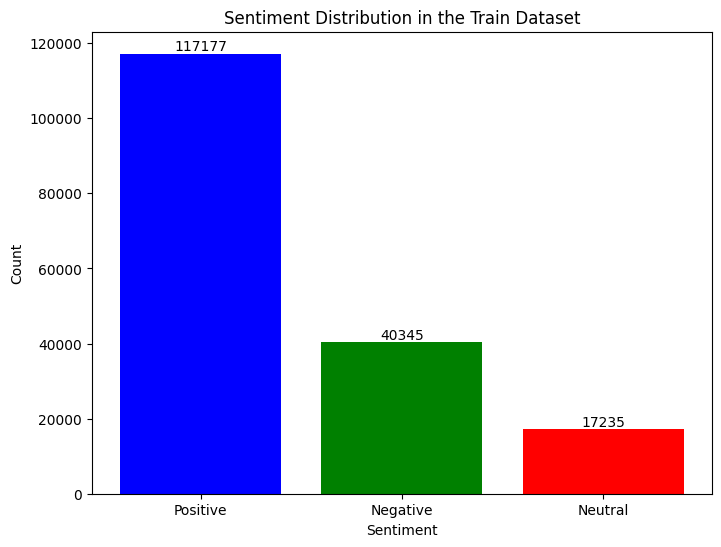

In [6]:
import matplotlib.pyplot as plt
# Plotting the bar graph
label_counts = preprocessed_train_dataset["sentiment"].value_counts()
labels = ["Positive","Negative","Neutral"]
plt.figure(figsize=(8, 6))
bars = plt.bar(labels,label_counts, color=['blue', 'green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution in the Train Dataset')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

# Balanced Training Data Class Distribution

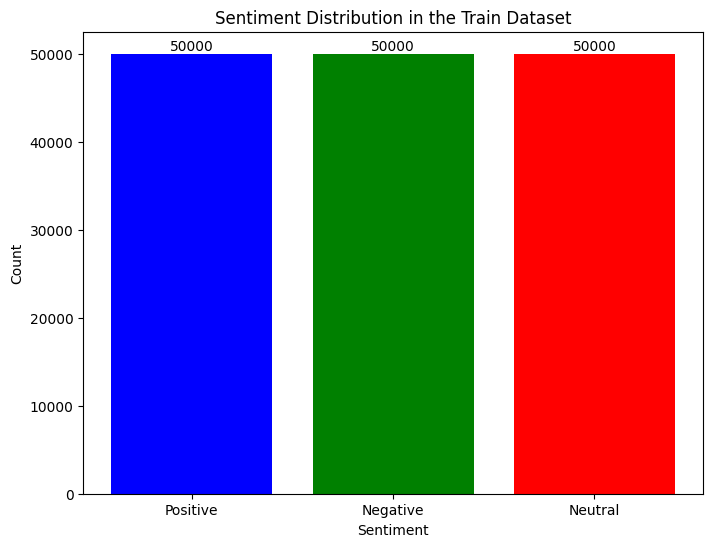

In [7]:
# Augmented Dataset
balanced_preprocessed_dataset = pd.read_csv(BALANCED_DATASET_PATH)
# Plotting the bar graph
label_counts = balanced_preprocessed_dataset["sentiment"].value_counts()
labels = ["Positive","Negative","Neutral"]
plt.figure(figsize=(8, 6))
bars = plt.bar(labels,label_counts, color=['blue', 'green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution in the Train Dataset')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

# Test Dataset Class Distribution

In [42]:
test_dataset = pd.read_csv(TEST_FILE)
preprocessor = DatasetPreprocessor(test_dataset)
preprocessed_test_dataset = preprocessor.preprocess_dataset()
preprocessed_test_dataset.head()

Preprocessing Dataset...
1. Removing punctuations


100%|██████████| 13980/13980 [00:00<00:00, 43466.35it/s]


2. Converting text to lower case


100%|██████████| 13980/13980 [00:00<00:00, 620740.30it/s]


3. Removing Stop Words
Stopwords already downloaded.


100%|██████████| 13980/13980 [00:02<00:00, 5021.97it/s]


4. Converting to stars to sentiment


100%|██████████| 13980/13980 [00:00<00:00, 935353.41it/s]

5. Enconding sentiments to 0, 1, 2 (Positive, Negative, Neutral)
Preprocessing done!


,review,sentiment
0,hidden treasure awesome service delicious food...,2
1,family patients since 5 years old 34 trust qua...,2
2,rarely get pedicures blue nails practice combi...,2
3,came large group may items missing menu lobste...,0
4,view great morgans pier bartenders even good s...,0


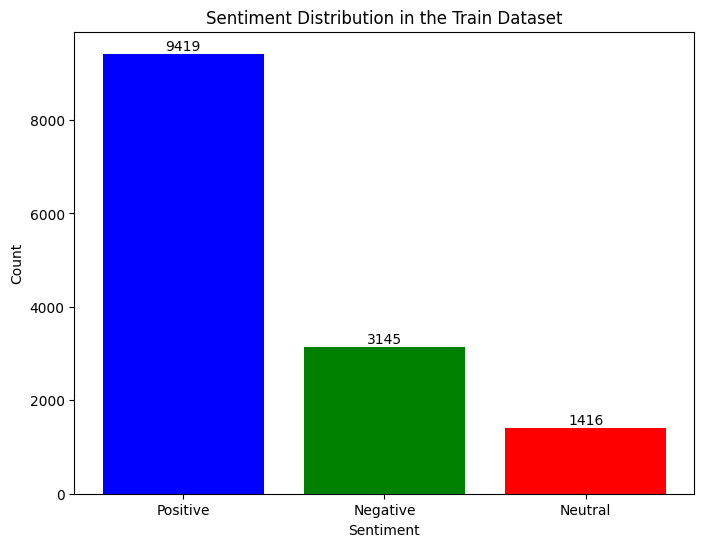

In [9]:
import matplotlib.pyplot as plt
# Plotting the bar graph
label_counts = preprocessed_test_dataset["sentiment"].value_counts()
labels = ["Positive","Negative","Neutral"]
plt.figure(figsize=(8, 6))
bars = plt.bar(labels,label_counts, color=['blue', 'green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution in the Test Dataset')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

### Analysis of Data Distribution of Sentiments in the Reviews

#### Train Dataset
| Sentiment | Count  |
|-----------|--------|
| Positive  | 117177 |
| Negative  |  40345 |
| Neutral   |  17235 |

As we can see in the graph and the table. There is a clear indication of an imbalance in the dataset. There are **117177** data points with `Positive Sentiment`, the highest. There are **40345** data points with `Negative Sentiment` and **17235** data points with `Neutral Sentiment`, which is the lowest.

#### Test Dataset
| Sentiment | Count  |
|-----------|--------|
| Positive  | 9419 |
| Negative  |  3145 |
| Neutral   |  1416 |

As we can see in the graph and the table. There is a clear indication of an imbalance in the dataset. There are **9419** data points with `Positive Sentiment`, the highest. There are **3145** data points with `Negative Sentiment` and **1416** data points with `Neutral Sentiment`, which is the lowest.

## Custom Loss Function

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        CE_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-CE_loss)  # Prevents nans when probability 0
        F_loss = self.alpha * (1 - pt)**self.gamma * CE_loss

        if self.reduction == 'mean':
            return torch.mean(F_loss)
        elif self.reduction == 'sum':
            return torch.sum(F_loss)
        else:
            return F_loss

## c) Transformer Implementation

In [11]:
import transformers
import torch.nn as nn
import torch
import torch.nn as nn
import numpy as np

from tqdm import tqdm
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score
from torch.utils.data import DataLoader
from collections import Counter


class RobertaSimpleClassifier(nn.Module):
    def __init__(self):
        super(RobertaSimpleClassifier, self).__init__()
        # RoBERTa model
        self.roberta = transformers.RobertaModel.from_pretrained('roberta-base')

        # Batch Normalization
        self.batch_norm = nn.BatchNorm1d(768)  # Updated to match RoBERTa output size

        # Dropout
        self.dropout = nn.Dropout(0.3)

        # Dense layer for classification
        self.classifier = nn.Linear(768, 3)  # Assuming 3 classes for classification

    def freeze_base_model(self):
        # Freeze all parameters in the RoBERTa model
        for param in self.roberta.parameters():
            param.requires_grad = False

    def unfreeze_layers(self, last_n_layers):
        # Freeze all layers first
        for param in self.roberta.parameters():
            param.requires_grad = False

        # Unfreeze the last `last_n_layers`
        for layer in self.roberta.encoder.layer[-last_n_layers:]:
            for param in layer.parameters():
                param.requires_grad = True

    def forward(self, input_ids, attention_mask):
        # RoBERTa outputs
        roberta_output = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        sequence_output = roberta_output.last_hidden_state
        pooled_output = sequence_output[:, 0, :]  # Use the <CLS> token for classification

        # Apply batch normalization only if batch size > 1
        if pooled_output.size(0) > 1:
            normalized_output = self.batch_norm(pooled_output)
        else:
            normalized_output = pooled_output

        dropout_output = self.dropout(normalized_output)

        # Classification
        logits = self.classifier(dropout_output)

        return logits


class RobertaGRUClassifier(nn.Module):
    def __init__(self):
        super(RobertaGRUClassifier, self).__init__()
        # RoBERTa model
        self.roberta = transformers.RobertaModel.from_pretrained('roberta-base')

        # GRU layer
        self.gru = nn.GRU(input_size=768, hidden_size=256, num_layers=1, batch_first=True)

        # Batch Normalization
        self.batch_norm = nn.BatchNorm1d(256)

        # Dropout
        self.dropout = nn.Dropout(0.3)

        # Flatten Layer
        self.flatten = nn.Flatten()

        # Dense layers
        self.dense1 = nn.Linear(256, 128)
        self.dense2 = nn.Linear(128, 3)  # Assuming 3 classes for classification

    def freeze_base_model(self):
        # Freeze all parameters in the BERT model
        for param in self.roberta.parameters():
            param.requires_grad = False

    def unfreeze_layers(self, last_n_layers):
        # Freeze all layers first
        for param in self.roberta.parameters():
            param.requires_grad = False

        # Unfreeze the last `last_n_layers`
        for layer in self.roberta.encoder.layer[-last_n_layers:]:
            for param in layer.parameters():
                param.requires_grad = True

    def forward(self, input_ids, attention_mask):
        # RoBERTa outputs
        roberta_output = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        sequence_output = roberta_output.last_hidden_state

        # GRU
        gru_output, _ = self.gru(sequence_output)
        gru_last_output = gru_output[:, -1, :]

        # Apply batch normalization only if batch size > 1
        if gru_last_output.size(0) > 1:
            normalized_output = self.batch_norm(gru_last_output)
        else:
            normalized_output = gru_last_output

        dropout_output = self.dropout(normalized_output)

        # Flatten the output for the dense layer
        flattened_output = self.flatten(dropout_output)

        # Dense layers
        dense_output = torch.relu(self.dense1(flattened_output))
        logits = self.dense2(dense_output)

        return logits

# Training, Validation and Test Loops

In [38]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
class Engine:
    def __init__(self,model,device,labels,model_type):
        self.model = model
        self.device = device
        self.labels = labels
        self.model_type = model_type

    def loss_fn(self, outputs, targets):
        return nn.CrossEntropyLoss()(outputs.view(-1,3), targets.view(-1))

    def focal_loss_fn(self, outputs, targets, alpha=1, gamma=2):
        focal_loss = FocalLoss(alpha=alpha, gamma=gamma, reduction='mean')

        return focal_loss(outputs.view(-1, 3), targets.view(-1))

    def plot_confusion_matrix(self, targets, outputs, class_names):
        # Convert outputs to predicted class indices
        predicted_labels = np.argmax(outputs, axis=1)
        cm = confusion_matrix(targets, predicted_labels)

        plt.figure(figsize=(10, 10))
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.colorbar()

        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names, rotation=45)
        plt.yticks(tick_marks, class_names)

        # Iterate over the confusion matrix and add labels to each cell
        for i, j in np.ndindex(cm.shape):
            plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()

    def plot_roc_curve(self,targets, outputs, n_classes):
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        targets_one_hot = np.eye(n_classes)[targets]  # Convert to one-hot encoding
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(targets_one_hot[:, i], np.array(outputs)[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot all ROC curves
        plt.figure()
        colors = cycle(['blue', 'red', 'green'])
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                    label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) - multi-class')
        plt.legend(loc="lower right")
        plt.show()

    def train_fn(self, data_loader_tqdm, optimizer, scheduler):
        self.model.train()
        loss = None

        total_loss = 0
        total_accuracy = 0
        num_batches = 0

        for bi, d in data_loader_tqdm:
            ids = d["ids"].to(self.device, dtype=torch.long)
            mask = d["mask"].to(self.device, dtype=torch.long)
            targets = d["targets"].to(self.device, dtype=torch.long)

            optimizer.zero_grad()

            if self.model_type == "bert":
                token_type_ids = d["token_type_ids"].to(self.device, dtype=torch.long)
                outputs = self.model(ids, mask, token_type_ids)
            else:  # Assuming RoBERTa or similar
                outputs = self.model(ids, mask)

            loss = self.loss_fn(outputs, targets)


            total_loss += loss.item()
            num_batches += 1
            preds = torch.argmax(outputs, dim=1)
            accuracy = accuracy_score(targets.cpu().numpy(), preds.cpu().numpy())
            total_accuracy += accuracy
            # Calculate cumulative average
            cumulative_avg_loss = total_loss / num_batches
            cumulative_avg_accuracy = total_accuracy / num_batches
            # Update tqdm description with cumulative average loss and accuracy
            data_loader_tqdm.set_description(f'Loss: {cumulative_avg_loss:.4f},Accuracy: {cumulative_avg_accuracy:.4f}')

            loss.backward()
            optimizer.step()
            scheduler.step()
        return total_loss / len(data_loader_tqdm), total_accuracy / len(data_loader_tqdm)


    def eval_fn(self,data_loader_tqdm):
        self.model.eval()
        fin_targets = []
        fin_outputs = []
        with torch.no_grad():
            for bi, d in data_loader_tqdm:
                ids = d["ids"].to(self.device, dtype=torch.long)
                mask = d["mask"].to(self.device, dtype=torch.long)
                targets = d["targets"].to(self.device, dtype=torch.long)

                if self.model_type == "bert":
                    token_type_ids = d["token_type_ids"].to(self.device, dtype=torch.long)
                    outputs = self.model(ids, mask, token_type_ids)
                else:  # Assuming RoBERTa or similar
                    outputs = self.model(ids,mask)

                # Convert model outputs to probabilities and then to class indices
                probs = torch.softmax(outputs, dim=1)
                fin_outputs.extend(probs.cpu().detach().numpy().tolist())
                # Add the true labels
                fin_targets.extend(targets.cpu().detach().numpy().tolist())
        return fin_outputs, fin_targets

    def test_eval_fn(self, test_data_loader):
        self.model.eval()
        all_targets = []
        all_probabilities = []
        all_predictions = []
        self.model.to(self.device)
        with torch.no_grad():
            for bi, d in tqdm(enumerate(test_data_loader), total=len(test_data_loader)):
                ids = d["ids"].to(self.device, dtype=torch.long)
                mask = d["mask"].to(self.device, dtype=torch.long)
                targets = d["targets"].to(self.device, dtype=torch.long)
                if self.model_type == "bert":
                    token_type_ids = d["token_type_ids"].to(self.device, dtype=torch.long)
                    outputs = self.model(ids,mask,token_type_ids)
                else:  # Assuming RoBERTa or similar
                    outputs = self.model(ids,mask)
                    _, predicted = torch.max(outputs, 1)
                    probabilities = torch.softmax(outputs, dim=1).cpu().numpy()
                    all_targets.extend(targets.view_as(predicted).cpu().numpy())
                    all_probabilities.extend(probabilities)
                    all_predictions.extend(predicted.cpu().numpy())
        # Calculate F1 Score
        f1 = f1_score(all_targets, all_predictions, average='weighted')
        print(f'F1 Score: {f1}')

        # Calculate and Print Test Accuracy
        test_accuracy = accuracy_score(all_targets, all_predictions)
        print(f'Test Accuracy: {test_accuracy:.2f}')

        # Calculate Per-Class Accuracy
        print('Per-Class Accuracy:')
        unique_labels = set(all_targets)
        for label in unique_labels:
            label_targets = [1 if t == label else 0 for t in all_targets]
            label_predictions = [1 if p == label else 0 for p in all_predictions]
            acc = accuracy_score(label_targets, label_predictions)
            print(f'Accuracy for class {label}: {acc}')

        # One-hot encode the targets
        num_classes = all_probabilities[0].size
        all_targets_one_hot = label_binarize(all_targets, classes=range(num_classes))

        # Calculate AUC for each class
        print('Per-Class AUC Score:')
        auc_scores = {}
        for i in range(num_classes):
            auc_score = roc_auc_score(all_targets_one_hot[:, i], np.array(all_probabilities)[:, i], multi_class='ovr')
            print(f"AUC Scores for Class {i}:", auc_score)

        return all_targets, all_probabilities



## Training

In [19]:
import torch
import os
import pandas as pd
import torch.nn as nn
import numpy as np
import sys
import logging
import datetime

from sklearn import model_selection
from transformers import AdamW
from transformers import get_linear_schedule_with_warmup

class Trainer:
    def __init__(self, config, base_path, dataset, log_dir="/content/drive/MyDrive/ml_project",device = 'cuda'):
        self.dataset = dataset
        self.config = config
        self.training_accuracies = []
        self.validation_accuracies = []
        self.training_losses = []
        self.base_path = base_path
        self.device = torch.device(device)
        self.log_dir = log_dir
        self.logger = self.init_logger()

    def save_preprocessed_data(self, data, filepath):
        data.to_csv(filepath, index=False)

    def load_preprocessed_data(self, filepath):
        return pd.read_csv(filepath)

    def init_logger(self):
        # Create a logger
        timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
        if not os.path.exists(self.log_dir):
            os.makedirs(self.log_dir)
        logger = logging.getLogger(f"trainer_{self.config.model_type}_{timestamp}")
        logger.setLevel(logging.INFO)
        if not logger.handlers:
            # Create handlers (console and file)
            c_handler = logging.StreamHandler()
            f_handler = logging.FileHandler(f'{self.log_dir}/training_{self.config.model_type}.log')
            c_handler.setLevel(logging.INFO)
            f_handler.setLevel(logging.INFO)

            # Create formatters and add them to handlers
            formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
            c_handler.setFormatter(formatter)
            f_handler.setFormatter(formatter)

            # Add handlers to the logger
            logger.addHandler(c_handler)
            logger.addHandler(f_handler)

        return logger

    def generate_model_path(self):
        # Construct a unique file name based on configuration parameters
        file_name = f"model_{self.config.model_type}_lr{self.config.learning_rate}_bs{self.config.train_batch_size}_ep{self.config.epochs}"
        if self.config.unfreeze_layers is not None:
            file_name += f"_unfreeze{self.config.unfreeze_layers}"

        file_name += ".pt"  # Add file extension for PyTorch model

        # Combine with the base directory
        model_path = self.base_path+file_name
        return model_path

    def train(self, epoch, train_data_loader, engine, optimizer, scheduler):
        # Training loop
        final_loss = 0
        final_accuracy = 0
        with tqdm(enumerate(train_data_loader), total=len(train_data_loader), unit="Batch") as data_loader_tqdm:
            data_loader_tqdm.set_description(f"Epoch {epoch}")
            train_loss, train_accuracy = engine.train_fn(data_loader_tqdm, optimizer, scheduler)
            self.training_accuracies.append(train_accuracy)
            self.training_losses.append(train_loss)
        self.logger.info(f"Epoch {epoch+1}/{self.config.epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

    def evaluate(self, epoch, valid_data_loader, engine, best_accuracy, model):

        with tqdm(enumerate(valid_data_loader), total=len(valid_data_loader)) as data_loader_tqdm:
            outputs, targets = engine.eval_fn(data_loader_tqdm)

        # Convert outputs to numpy arrays and then to class indices
        predicted_labels = np.argmax(outputs, axis=1)
        # Convert targets to numpy arrays
        targets = np.array(targets)

        accuracy = metrics.accuracy_score(targets, predicted_labels)
        self.validation_accuracies.append(accuracy)
        self.logger.info(f"Validation - Epoch: {epoch} Accuracy: {100. * accuracy}%")
        if accuracy > best_accuracy:
            model_path = self.generate_model_path()
            print(model_path)
            model_dir = os.path.dirname(model_path)

            if not os.path.exists(model_dir):
                os.makedirs(model_dir)
            torch.save(model.state_dict(), model_path)
            best_accuracy = accuracy

    def run(self):
        warnings.filterwarnings('ignore')

        df_train, df_valid = model_selection.train_test_split(
            self.dataset, test_size=0.1, random_state=42, stratify=self.dataset.sentiment.values
        )

        df_train = df_train.reset_index(drop=True)
        df_valid = df_valid.reset_index(drop=True)

        train_dataset = RoBERTaDataset(
            review=df_train.review.values, target=df_train.sentiment.values
        )
        valid_dataset = RoBERTaDataset(
            review=df_valid.review.values, target=df_valid.sentiment.values
        )


        train_data_loader = torch.utils.data.DataLoader(
            train_dataset, batch_size=self.config.train_batch_size, num_workers=4
        )

        valid_data_loader = torch.utils.data.DataLoader(
            valid_dataset, batch_size=self.config.valid_batch_size, num_workers=1
        )

        if self.config.model_type.lower() == 'roberta-simple':
            print("Picking Roberta Simple Classifier Model")
            model = RobertaSimpleClassifier()
        elif self.config.model_type.lower() == 'roberta-gru':
            print("Picking Robert-GRU Model")
            model = RobertaGRUClassifier()
        else:
            print("Model not supported")
            sys.exit(1)

        model.to(self.device)
        model.freeze_base_model()
        param_optimizer = list(model.named_parameters())

        num_train_steps = int(len(df_train) / self.config.train_batch_size * self.config.epochs)
        optimizer = torch.optim.AdamW(model.parameters(),lr=self.config.learning_rate)
        scheduler = get_linear_schedule_with_warmup(
            optimizer, num_warmup_steps=0, num_training_steps=num_train_steps
        )

        engine = Engine(model,self.device,df_train.sentiment.values,self.config.model_type.lower())
        best_accuracy = 0

        for epoch in range(self.config.epochs):
            self.train(epoch, train_data_loader, engine, optimizer, scheduler)
            self.evaluate(epoch, valid_data_loader, engine, best_accuracy, model)

        if self.config.unfreeze_layers:
            model.unfreeze_layers(self.config.unfreeze_layers)
            print(f"Unfreezing last {self.config.unfreeze_layers} layers of RoBERTa.")
            optimizer = torch.optim.AdamW(model.parameters(),lr=self.config.learning_rate)
            scheduler = get_linear_schedule_with_warmup(
                optimizer, num_warmup_steps=0, num_training_steps=num_train_steps
            )
            for epoch in range(8):
                self.train(epoch, train_data_loader, engine, optimizer, scheduler)
                self.evaluate(epoch, valid_data_loader, engine, best_accuracy,model)



In [36]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from itertools import cycle

class Tester:

  def __init__(self, dataset, config, device = 'cuda',base_model_path='/content/drive/MyDrive/Models/'):
      self.dataset = dataset
      self.config = config
      self.device = torch.device(device)
      self.model_path = self.generate_model_path(base_model_path)

  def generate_model_path(self,base_model_path):
        # Construct a unique file name based on configuration parameters
        file_name = f"model_{self.config.model_type}_lr{self.config.learning_rate}_bs{self.config.train_batch_size}_ep{self.config.epochs}"
        if self.config.unfreeze_layers is not None:
            file_name += f"_unfreeze{self.config.unfreeze_layers}"

        file_name += ".pt"  # Add file extension for PyTorch model

        # Combine with the base directory
        model_path = base_model_path +file_name
        return model_path

  def run_test(self):
      state_dict = torch.load(self.model_path)
      if self.config.model_type.lower() == 'roberta-simple':
          print("Picking Roberta Simple Classifier Model")
          model = RobertaSimpleClassifier()
      elif self.config.model_type.lower() == 'roberta-gru':
          print("Picking Robert-GRU Model")
          model = RobertaGRUClassifier()
      else:
          print("Model not supported")
          sys.exit(1)
      model.load_state_dict(state_dict)

      warnings.filterwarnings('ignore')
      #Read the training dataset from the CSV file
      test_raw_dataset = pd.read_csv(TEST_FILE).fillna("none")

      df_test = self.dataset
      df_test = df_test.reset_index(drop=True)

      test_dataset = RoBERTaDataset(
          review=df_test.review.values, target=df_test.sentiment.values
      )

      test_data_loader = torch.utils.data.DataLoader(
          test_dataset, batch_size=32, num_workers=4
      )
      class_names = ['Negative', 'Neutral', 'Positive']
      engine = Engine(model,self.device,df_test.sentiment.values,self.config.model_type.lower())
      targets, outputs = engine.test_eval_fn(test_data_loader)
      engine.plot_confusion_matrix(targets, outputs, class_names)
      engine.plot_roc_curve(targets, outputs, len(class_names))

# Comparison Between Roberta Simple Model Vs Roberta GRU Model

Let us take a subset of the dataset to do this experiment:
- Dataset Size: 45,000 (Negative: 15000, Neutral: 15000, Positive: 15000)

In [44]:
# configuration
class Config:
    def __init__(self, learning_rate, train_batch_size, valid_batch_size, epochs, model_type, unfreeze_layers=None):
        self.learning_rate = learning_rate
        self.train_batch_size = train_batch_size
        self.valid_batch_size = valid_batch_size
        self.epochs = epochs
        self.model_type = model_type
        self.unfreeze_layers = unfreeze_layers
        # Add other relevant config parameters as needed

    def pretty_print(self):
        print(f"Configuration:\n"
                f"  Model Type: {self.model_type}\n"
                f"  Learning Rate: {self.learning_rate}\n"
                f"  Training Batch Size: {self.train_batch_size}\n"
                f"  Validation Batch Size: {self.valid_batch_size}\n"
                f"  Epochs: {self.epochs}\n"
                f"  Unfreeze Layers: {'None' if self.unfreeze_layers is None else self.unfreeze_layers}\n")

# Define a list of configurations for Hyper Parameter Tuning
configs = [
    Config(1e-5, 16,32, 3, 'roberta-simple'),
    Config(2e-5, 32,64, 3, 'roberta-simple'),
    Config(1e-5, 16,32, 6, 'roberta-simple'),
    Config(1e-5, 16,32, 3, 'roberta-gru'),
    Config(2e-5, 32,64, 3, 'roberta-gru'),
    Config(1e-5, 16,32, 6, 'roberta-gru'),
    Config(3e-5, 32,64, 4, 'roberta-simple'),
    Config(3e-5, 32,64, 4, 'roberta-gru'),
    Config(1e-5, 64,64, 5, 'roberta-simple'),
    Config(1e-5, 64,64, 5, 'roberta-gru'),
    Config(1e-5, 32,64, 2, 'roberta-gru', unfreeze_layers=6),
    Config(1e-5, 32,64, 2, 'roberta-gru', unfreeze_layers=12),
    Config(1e-5, 32,64, 2, 'roberta-simple', unfreeze_layers=6),
    Config(1e-5, 32,64, 2, 'roberta-simple', unfreeze_layers=12)
]

In [22]:
import pandas as pd

# Get unique classes
classes = balanced_preprocessed_dataset['sentiment'].unique()

# Initialize an empty DataFrame to hold the balanced dataset
balanced_dataset = pd.DataFrame()

# Loop over each class and sample 15,000 rows
for class_label in classes:
    class_subset = balanced_preprocessed_dataset[balanced_preprocessed_dataset['sentiment'] == class_label]

    # Sample 15,000 rows from each class
    # Replace with class_subset.sample(n=15000, replace=True) if you have less than 15k rows per class and need to sample with replacement
    sampled_subset = class_subset.sample(n=15000, random_state=42)

    # Concatenate to the balanced dataset
    balanced_dataset = pd.concat([balanced_dataset, sampled_subset], axis=0)

# Reset index of the final balanced dataset
balanced_dataset = balanced_dataset.reset_index(drop=True)

# Now balanced_dataset has 15,000 samples from each class
balanced_dataset['sentiment'].value_counts()

2    15000
0    15000
1    15000
Name: sentiment, dtype: int64

In [45]:
#Output is captured in a log file
for config in configs:
    config.pretty_print()
    trainer = Trainer(config,MODEL_BASE_PATH,balanced_dataset)
    trainer.run()

Configuration:
  Model Type: roberta-simple
  Learning Rate: 1e-05
  Training Batch Size: 32
  Validation Batch Size: 64
  Epochs: 2
  Unfreeze Layers: 6

Picking Roberta Simple Classifier Model


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Loss: 1.1656,Accuracy: 0.3778: 100%|██████████| 1266/1266 [03:01<00:00,  6.99Batch/s]
2023-12-12 17:27:26,095 - INFO - Epoch 1/2, Train Loss: 1.1656, Train Accuracy: 0.3778
INFO:trainer_roberta-simple_20231212_172423:Epoch 1/2, Train Loss: 1.1656, Train Accuracy: 0.3778
100%|██████████| 71/71 [00:17<00:00,  4.02it/s]
2023-12-12 17:27:43,858 - INFO - Validation - Epoch: 0 Accuracy: 46.044444444444444%
INFO:trainer_roberta-simple_20231212_172423:Validation - Epoch: 0 Accuracy: 46.044444444444444%


/content/drive/MyDrive/Models/model_roberta-simple_lr1e-05_bs32_ep2_unfreeze6.pt


Loss: 1.0890,Accuracy: 0.4445: 100%|██████████| 1266/1266 [03:01<00:00,  6.97Batch/s]
2023-12-12 17:30:46,895 - INFO - Epoch 2/2, Train Loss: 1.0890, Train Accuracy: 0.4445
INFO:trainer_roberta-simple_20231212_172423:Epoch 2/2, Train Loss: 1.0890, Train Accuracy: 0.4445
100%|██████████| 71/71 [00:17<00:00,  4.02it/s]
2023-12-12 17:31:04,636 - INFO - Validation - Epoch: 1 Accuracy: 50.17777777777778%
INFO:trainer_roberta-simple_20231212_172423:Validation - Epoch: 1 Accuracy: 50.17777777777778%


/content/drive/MyDrive/Models/model_roberta-simple_lr1e-05_bs32_ep2_unfreeze6.pt
Unfreezing last 6 layers of RoBERTa.


Loss: 0.6109,Accuracy: 0.7443: 100%|██████████| 1266/1266 [05:38<00:00,  3.74Batch/s]
2023-12-12 17:36:44,879 - INFO - Epoch 1/2, Train Loss: 0.6109, Train Accuracy: 0.7443
INFO:trainer_roberta-simple_20231212_172423:Epoch 1/2, Train Loss: 0.6109, Train Accuracy: 0.7443
100%|██████████| 71/71 [00:17<00:00,  4.01it/s]
2023-12-12 17:37:02,651 - INFO - Validation - Epoch: 0 Accuracy: 79.64444444444445%
INFO:trainer_roberta-simple_20231212_172423:Validation - Epoch: 0 Accuracy: 79.64444444444445%


/content/drive/MyDrive/Models/model_roberta-simple_lr1e-05_bs32_ep2_unfreeze6.pt


Loss: 0.4907,Accuracy: 0.8015: 100%|██████████| 1266/1266 [05:38<00:00,  3.73Batch/s]
2023-12-12 17:42:43,142 - INFO - Epoch 2/2, Train Loss: 0.4907, Train Accuracy: 0.8015
INFO:trainer_roberta-simple_20231212_172423:Epoch 2/2, Train Loss: 0.4907, Train Accuracy: 0.8015
100%|██████████| 71/71 [00:17<00:00,  4.02it/s]
2023-12-12 17:43:00,897 - INFO - Validation - Epoch: 1 Accuracy: 81.86666666666666%
INFO:trainer_roberta-simple_20231212_172423:Validation - Epoch: 1 Accuracy: 81.86666666666666%


/content/drive/MyDrive/Models/model_roberta-simple_lr1e-05_bs32_ep2_unfreeze6.pt


Loss: 0.4622,Accuracy: 0.8148: 100%|██████████| 1266/1266 [05:38<00:00,  3.73Batch/s]
2023-12-12 17:48:41,379 - INFO - Epoch 3/2, Train Loss: 0.4622, Train Accuracy: 0.8148
INFO:trainer_roberta-simple_20231212_172423:Epoch 3/2, Train Loss: 0.4622, Train Accuracy: 0.8148
100%|██████████| 71/71 [00:17<00:00,  4.01it/s]
2023-12-12 17:48:59,156 - INFO - Validation - Epoch: 2 Accuracy: 81.86666666666666%
INFO:trainer_roberta-simple_20231212_172423:Validation - Epoch: 2 Accuracy: 81.86666666666666%


/content/drive/MyDrive/Models/model_roberta-simple_lr1e-05_bs32_ep2_unfreeze6.pt


Loss: 0.4656,Accuracy: 0.8123: 100%|██████████| 1266/1266 [05:38<00:00,  3.74Batch/s]
2023-12-12 17:54:39,446 - INFO - Epoch 4/2, Train Loss: 0.4656, Train Accuracy: 0.8123
INFO:trainer_roberta-simple_20231212_172423:Epoch 4/2, Train Loss: 0.4656, Train Accuracy: 0.8123
100%|██████████| 71/71 [00:17<00:00,  4.02it/s]
2023-12-12 17:54:57,199 - INFO - Validation - Epoch: 3 Accuracy: 81.88888888888889%
INFO:trainer_roberta-simple_20231212_172423:Validation - Epoch: 3 Accuracy: 81.88888888888889%


/content/drive/MyDrive/Models/model_roberta-simple_lr1e-05_bs32_ep2_unfreeze6.pt


Loss: 0.4618,Accuracy: 0.8138: 100%|██████████| 1266/1266 [05:39<00:00,  3.73Batch/s]
2023-12-12 18:00:37,909 - INFO - Epoch 5/2, Train Loss: 0.4618, Train Accuracy: 0.8138
INFO:trainer_roberta-simple_20231212_172423:Epoch 5/2, Train Loss: 0.4618, Train Accuracy: 0.8138
100%|██████████| 71/71 [00:17<00:00,  4.01it/s]
2023-12-12 18:00:55,677 - INFO - Validation - Epoch: 4 Accuracy: 81.68888888888888%
INFO:trainer_roberta-simple_20231212_172423:Validation - Epoch: 4 Accuracy: 81.68888888888888%


/content/drive/MyDrive/Models/model_roberta-simple_lr1e-05_bs32_ep2_unfreeze6.pt


Loss: 0.4647,Accuracy: 0.8120: 100%|██████████| 1266/1266 [05:38<00:00,  3.74Batch/s]
2023-12-12 18:06:36,015 - INFO - Epoch 6/2, Train Loss: 0.4647, Train Accuracy: 0.8120
INFO:trainer_roberta-simple_20231212_172423:Epoch 6/2, Train Loss: 0.4647, Train Accuracy: 0.8120
100%|██████████| 71/71 [00:17<00:00,  4.01it/s]
2023-12-12 18:06:53,784 - INFO - Validation - Epoch: 5 Accuracy: 81.88888888888889%
INFO:trainer_roberta-simple_20231212_172423:Validation - Epoch: 5 Accuracy: 81.88888888888889%


/content/drive/MyDrive/Models/model_roberta-simple_lr1e-05_bs32_ep2_unfreeze6.pt


Loss: 0.4623,Accuracy: 0.8139: 100%|██████████| 1266/1266 [05:38<00:00,  3.73Batch/s]
2023-12-12 18:12:34,251 - INFO - Epoch 7/2, Train Loss: 0.4623, Train Accuracy: 0.8139
INFO:trainer_roberta-simple_20231212_172423:Epoch 7/2, Train Loss: 0.4623, Train Accuracy: 0.8139
100%|██████████| 71/71 [00:17<00:00,  4.02it/s]
2023-12-12 18:12:52,005 - INFO - Validation - Epoch: 6 Accuracy: 81.86666666666666%
INFO:trainer_roberta-simple_20231212_172423:Validation - Epoch: 6 Accuracy: 81.86666666666666%


/content/drive/MyDrive/Models/model_roberta-simple_lr1e-05_bs32_ep2_unfreeze6.pt


Loss: 0.4631,Accuracy: 0.8130: 100%|██████████| 1266/1266 [05:39<00:00,  3.73Batch/s]
2023-12-12 18:18:33,295 - INFO - Epoch 8/2, Train Loss: 0.4631, Train Accuracy: 0.8130
INFO:trainer_roberta-simple_20231212_172423:Epoch 8/2, Train Loss: 0.4631, Train Accuracy: 0.8130
100%|██████████| 71/71 [00:17<00:00,  4.00it/s]
2023-12-12 18:18:51,129 - INFO - Validation - Epoch: 7 Accuracy: 81.82222222222222%
INFO:trainer_roberta-simple_20231212_172423:Validation - Epoch: 7 Accuracy: 81.82222222222222%


/content/drive/MyDrive/Models/model_roberta-simple_lr1e-05_bs32_ep2_unfreeze6.pt
Configuration:
  Model Type: roberta-simple
  Learning Rate: 1e-05
  Training Batch Size: 32
  Validation Batch Size: 64
  Epochs: 2
  Unfreeze Layers: 12

Picking Roberta Simple Classifier Model


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Loss: 1.1594,Accuracy: 0.3782: 100%|██████████| 1266/1266 [03:02<00:00,  6.95Batch/s]
2023-12-12 18:21:56,464 - INFO - Epoch 1/2, Train Loss: 1.1594, Train Accuracy: 0.3782
INFO:trainer_roberta-simple_20231212_181852:Epoch 1/2, Train Loss: 1.1594, Train Accuracy: 0.3782
100%|██████████| 71/71 [00:17<00:00,  4.02it/s]
2023-12-12 18:22:14,212 - INFO - Validation - Epoch: 0 Accuracy: 50.33333333333333%
INFO:trainer_roberta-simple_20231212_181852:Validation - Epoch: 0 Accuracy: 50.33333333333333%


/content/drive/MyDrive/Models/model_roberta-simple_lr1e-05_bs32_ep2_unfreeze12.pt


Loss: 1.0760,Accuracy: 0.4563: 100%|██████████| 1266/1266 [03:01<00:00,  6.97Batch/s]
2023-12-12 18:25:17,371 - INFO - Epoch 2/2, Train Loss: 1.0760, Train Accuracy: 0.4563
INFO:trainer_roberta-simple_20231212_181852:Epoch 2/2, Train Loss: 1.0760, Train Accuracy: 0.4563
100%|██████████| 71/71 [00:17<00:00,  4.02it/s]
2023-12-12 18:25:35,128 - INFO - Validation - Epoch: 1 Accuracy: 54.22222222222223%
INFO:trainer_roberta-simple_20231212_181852:Validation - Epoch: 1 Accuracy: 54.22222222222223%


/content/drive/MyDrive/Models/model_roberta-simple_lr1e-05_bs32_ep2_unfreeze12.pt
Unfreezing last 12 layers of RoBERTa.


Loss: 0.5638,Accuracy: 0.7668: 100%|██████████| 1266/1266 [08:22<00:00,  2.52Batch/s]
2023-12-12 18:33:59,062 - INFO - Epoch 1/2, Train Loss: 0.5638, Train Accuracy: 0.7668
INFO:trainer_roberta-simple_20231212_181852:Epoch 1/2, Train Loss: 0.5638, Train Accuracy: 0.7668
100%|██████████| 71/71 [00:17<00:00,  4.01it/s]
2023-12-12 18:34:16,867 - INFO - Validation - Epoch: 0 Accuracy: 81.22222222222221%
INFO:trainer_roberta-simple_20231212_181852:Validation - Epoch: 0 Accuracy: 81.22222222222221%


/content/drive/MyDrive/Models/model_roberta-simple_lr1e-05_bs32_ep2_unfreeze12.pt


Loss: 0.4273,Accuracy: 0.8288: 100%|██████████| 1266/1266 [08:22<00:00,  2.52Batch/s]
2023-12-12 18:42:41,019 - INFO - Epoch 2/2, Train Loss: 0.4273, Train Accuracy: 0.8288
INFO:trainer_roberta-simple_20231212_181852:Epoch 2/2, Train Loss: 0.4273, Train Accuracy: 0.8288
100%|██████████| 71/71 [00:17<00:00,  4.00it/s]
2023-12-12 18:42:58,831 - INFO - Validation - Epoch: 1 Accuracy: 83.13333333333334%
INFO:trainer_roberta-simple_20231212_181852:Validation - Epoch: 1 Accuracy: 83.13333333333334%


/content/drive/MyDrive/Models/model_roberta-simple_lr1e-05_bs32_ep2_unfreeze12.pt


Loss: 0.3880,Accuracy: 0.8458: 100%|██████████| 1266/1266 [08:22<00:00,  2.52Batch/s]
2023-12-12 18:51:23,069 - INFO - Epoch 3/2, Train Loss: 0.3880, Train Accuracy: 0.8458
INFO:trainer_roberta-simple_20231212_181852:Epoch 3/2, Train Loss: 0.3880, Train Accuracy: 0.8458
100%|██████████| 71/71 [00:17<00:00,  4.00it/s]
2023-12-12 18:51:40,884 - INFO - Validation - Epoch: 2 Accuracy: 83.15555555555557%
INFO:trainer_roberta-simple_20231212_181852:Validation - Epoch: 2 Accuracy: 83.15555555555557%


/content/drive/MyDrive/Models/model_roberta-simple_lr1e-05_bs32_ep2_unfreeze12.pt


Loss: 0.3902,Accuracy: 0.8443: 100%|██████████| 1266/1266 [08:22<00:00,  2.52Batch/s]
2023-12-12 19:00:05,245 - INFO - Epoch 4/2, Train Loss: 0.3902, Train Accuracy: 0.8443
INFO:trainer_roberta-simple_20231212_181852:Epoch 4/2, Train Loss: 0.3902, Train Accuracy: 0.8443
100%|██████████| 71/71 [00:17<00:00,  4.00it/s]
2023-12-12 19:00:23,065 - INFO - Validation - Epoch: 3 Accuracy: 82.95555555555556%
INFO:trainer_roberta-simple_20231212_181852:Validation - Epoch: 3 Accuracy: 82.95555555555556%


/content/drive/MyDrive/Models/model_roberta-simple_lr1e-05_bs32_ep2_unfreeze12.pt


Loss: 0.3866,Accuracy: 0.8460: 100%|██████████| 1266/1266 [08:22<00:00,  2.52Batch/s]
2023-12-12 19:08:47,156 - INFO - Epoch 5/2, Train Loss: 0.3866, Train Accuracy: 0.8460
INFO:trainer_roberta-simple_20231212_181852:Epoch 5/2, Train Loss: 0.3866, Train Accuracy: 0.8460
100%|██████████| 71/71 [00:17<00:00,  4.01it/s]
2023-12-12 19:09:04,939 - INFO - Validation - Epoch: 4 Accuracy: 83.17777777777778%
INFO:trainer_roberta-simple_20231212_181852:Validation - Epoch: 4 Accuracy: 83.17777777777778%


/content/drive/MyDrive/Models/model_roberta-simple_lr1e-05_bs32_ep2_unfreeze12.pt


Loss: 0.3873,Accuracy: 0.8453: 100%|██████████| 1266/1266 [08:21<00:00,  2.52Batch/s]
2023-12-12 19:17:27,992 - INFO - Epoch 6/2, Train Loss: 0.3873, Train Accuracy: 0.8453
INFO:trainer_roberta-simple_20231212_181852:Epoch 6/2, Train Loss: 0.3873, Train Accuracy: 0.8453
100%|██████████| 71/71 [00:17<00:00,  4.01it/s]
2023-12-12 19:17:45,797 - INFO - Validation - Epoch: 5 Accuracy: 83.11111111111111%
INFO:trainer_roberta-simple_20231212_181852:Validation - Epoch: 5 Accuracy: 83.11111111111111%


/content/drive/MyDrive/Models/model_roberta-simple_lr1e-05_bs32_ep2_unfreeze12.pt


Loss: 0.3901,Accuracy: 0.8448: 100%|██████████| 1266/1266 [08:21<00:00,  2.52Batch/s]
2023-12-12 19:26:09,277 - INFO - Epoch 7/2, Train Loss: 0.3901, Train Accuracy: 0.8448
INFO:trainer_roberta-simple_20231212_181852:Epoch 7/2, Train Loss: 0.3901, Train Accuracy: 0.8448
100%|██████████| 71/71 [00:17<00:00,  4.01it/s]
2023-12-12 19:26:27,074 - INFO - Validation - Epoch: 6 Accuracy: 83.15555555555557%
INFO:trainer_roberta-simple_20231212_181852:Validation - Epoch: 6 Accuracy: 83.15555555555557%


/content/drive/MyDrive/Models/model_roberta-simple_lr1e-05_bs32_ep2_unfreeze12.pt


Loss: 0.3904,Accuracy: 0.8431: 100%|██████████| 1266/1266 [08:21<00:00,  2.52Batch/s]
2023-12-12 19:34:50,084 - INFO - Epoch 8/2, Train Loss: 0.3904, Train Accuracy: 0.8431
INFO:trainer_roberta-simple_20231212_181852:Epoch 8/2, Train Loss: 0.3904, Train Accuracy: 0.8431
100%|██████████| 71/71 [00:17<00:00,  4.01it/s]
2023-12-12 19:35:07,872 - INFO - Validation - Epoch: 7 Accuracy: 83.0%
INFO:trainer_roberta-simple_20231212_181852:Validation - Epoch: 7 Accuracy: 83.0%


/content/drive/MyDrive/Models/model_roberta-simple_lr1e-05_bs32_ep2_unfreeze12.pt


## Test functions

Configuration:
  Model Type: roberta-simple
  Learning Rate: 1e-05
  Training Batch Size: 16
  Validation Batch Size: 32
  Epochs: 3
  Unfreeze Layers: None

Picking Roberta Simple Classifier Model


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 437/437 [00:56<00:00,  7.67it/s]


F1 Score: 0.7286372757930486
Test Accuracy: 0.71
Per-Class Accuracy:
Accuracy for class 0: 0.8383404864091559
Accuracy for class 1: 0.824964234620887
Accuracy for class 2: 0.7640200286123033
Per-Class AUC Score:
AUC Scores for Class 0: 0.8876342419131311
AUC Scores for Class 1: 0.7059088540120908
AUC Scores for Class 2: 0.8589261015679704


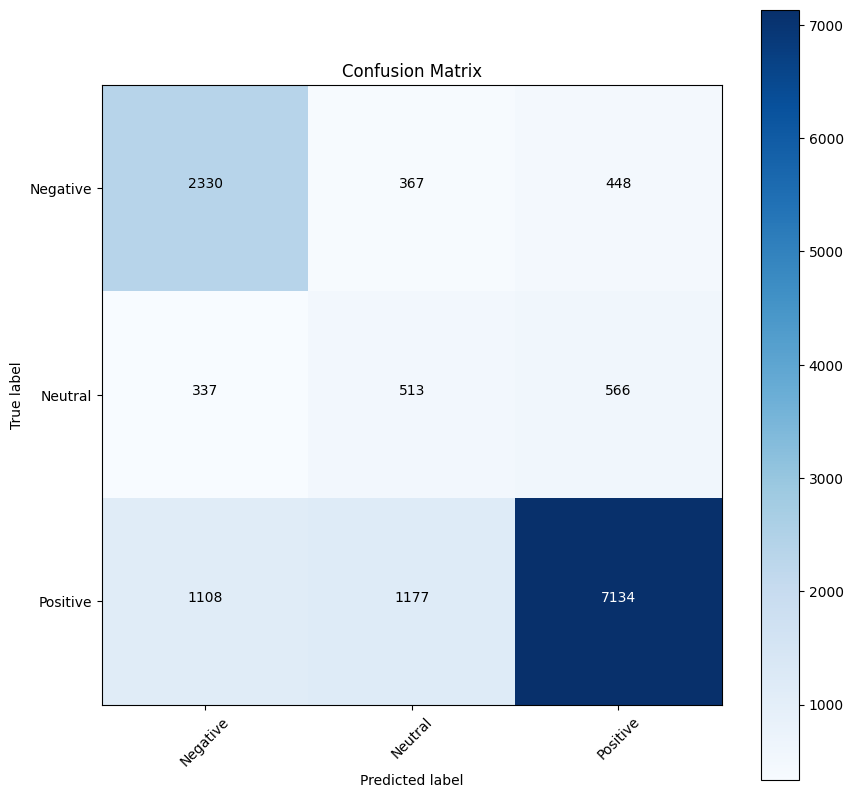

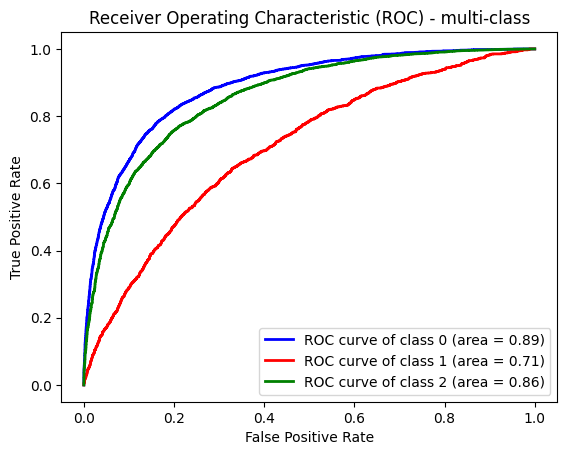

Configuration:
  Model Type: roberta-simple
  Learning Rate: 2e-05
  Training Batch Size: 32
  Validation Batch Size: 64
  Epochs: 3
  Unfreeze Layers: None

Picking Roberta Simple Classifier Model


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 437/437 [00:57<00:00,  7.66it/s]


F1 Score: 0.7318875044019426
Test Accuracy: 0.71
Per-Class Accuracy:
Accuracy for class 0: 0.8467095851216023
Accuracy for class 1: 0.8034334763948497
Accuracy for class 2: 0.7700286123032904
Per-Class AUC Score:
AUC Scores for Class 0: 0.8871697664710505
AUC Scores for Class 1: 0.7183509976940662
AUC Scores for Class 2: 0.8684319427959817


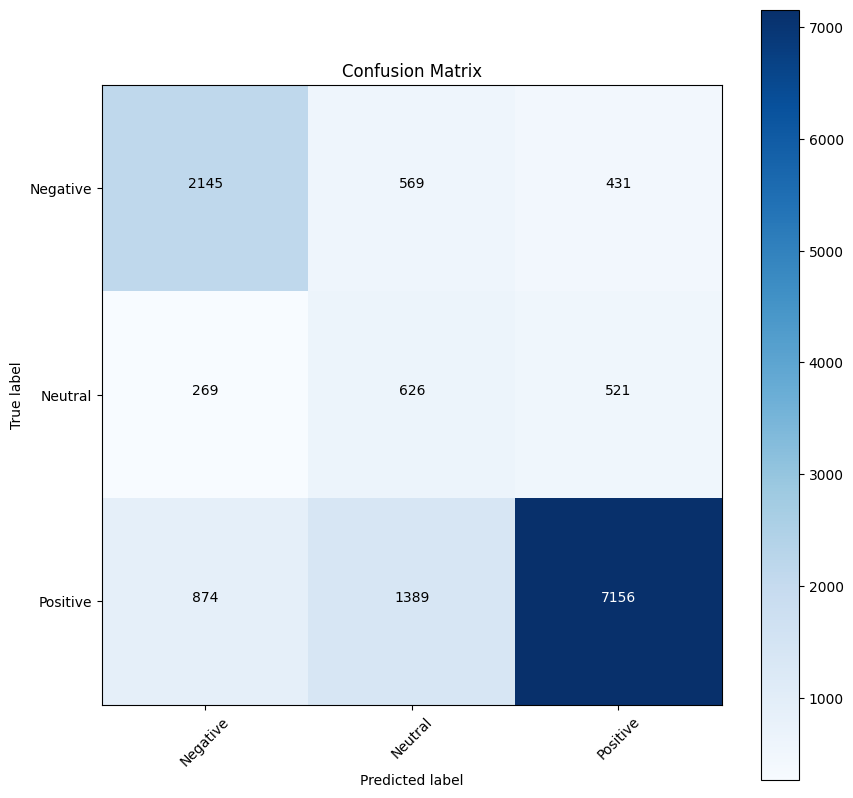

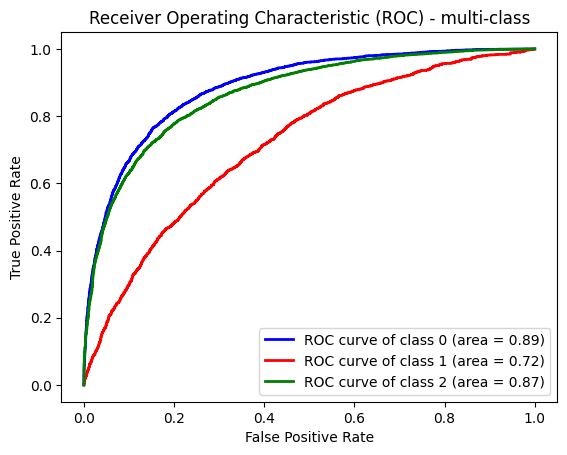

Configuration:
  Model Type: roberta-simple
  Learning Rate: 1e-05
  Training Batch Size: 16
  Validation Batch Size: 32
  Epochs: 6
  Unfreeze Layers: None

Picking Roberta Simple Classifier Model


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 437/437 [00:57<00:00,  7.66it/s]


F1 Score: 0.7655771139046582
Test Accuracy: 0.75
Per-Class Accuracy:
Accuracy for class 0: 0.8577968526466381
Accuracy for class 1: 0.8447067238912732
Accuracy for class 2: 0.8043633762517882
Per-Class AUC Score:
AUC Scores for Class 0: 0.9093336307071751
AUC Scores for Class 1: 0.7716168921337442
AUC Scores for Class 2: 0.8944813599999943


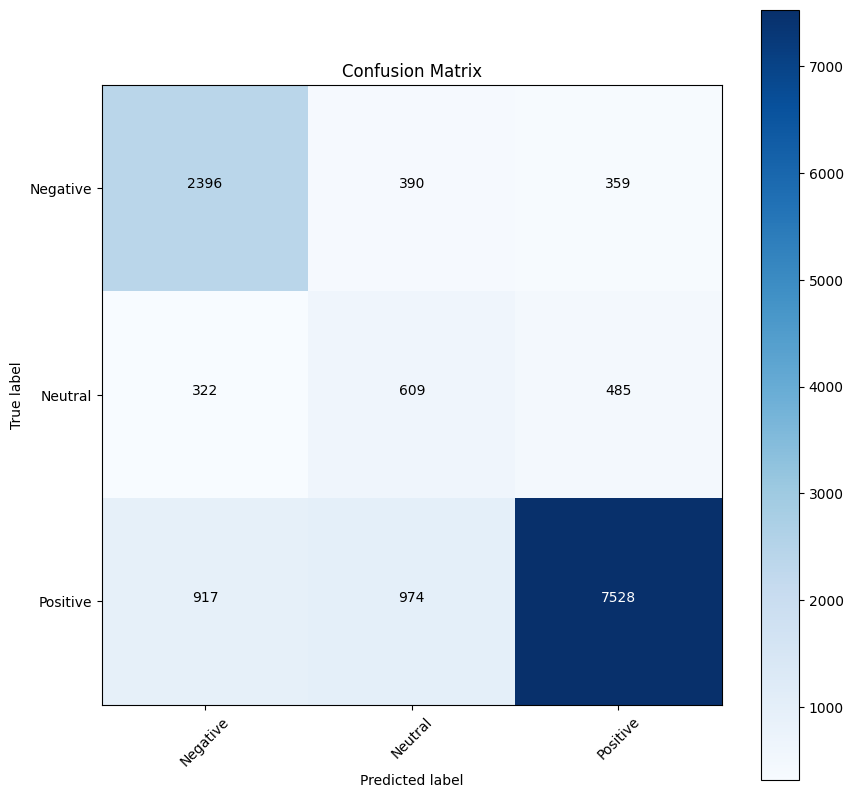

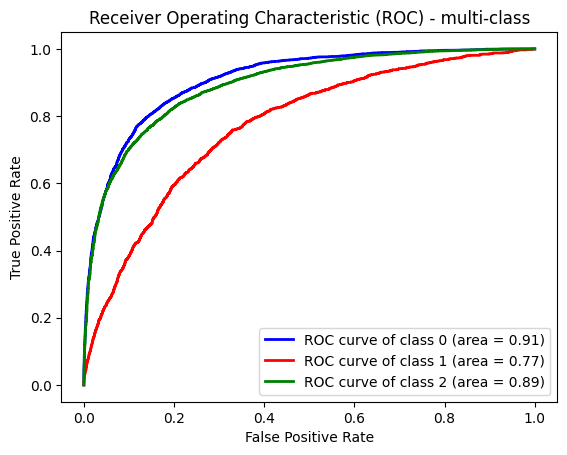

Configuration:
  Model Type: roberta-gru
  Learning Rate: 1e-05
  Training Batch Size: 16
  Validation Batch Size: 32
  Epochs: 3
  Unfreeze Layers: None

Picking Robert-GRU Model


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 437/437 [00:59<00:00,  7.32it/s]


F1 Score: 0.7899620705581719
Test Accuracy: 0.78
Per-Class Accuracy:
Accuracy for class 0: 0.8861945636623748
Accuracy for class 1: 0.8356938483547925
Accuracy for class 2: 0.8296137339055794
Per-Class AUC Score:
AUC Scores for Class 0: 0.9415883431410456
AUC Scores for Class 1: 0.7827282505661409
AUC Scores for Class 2: 0.9175833301346259


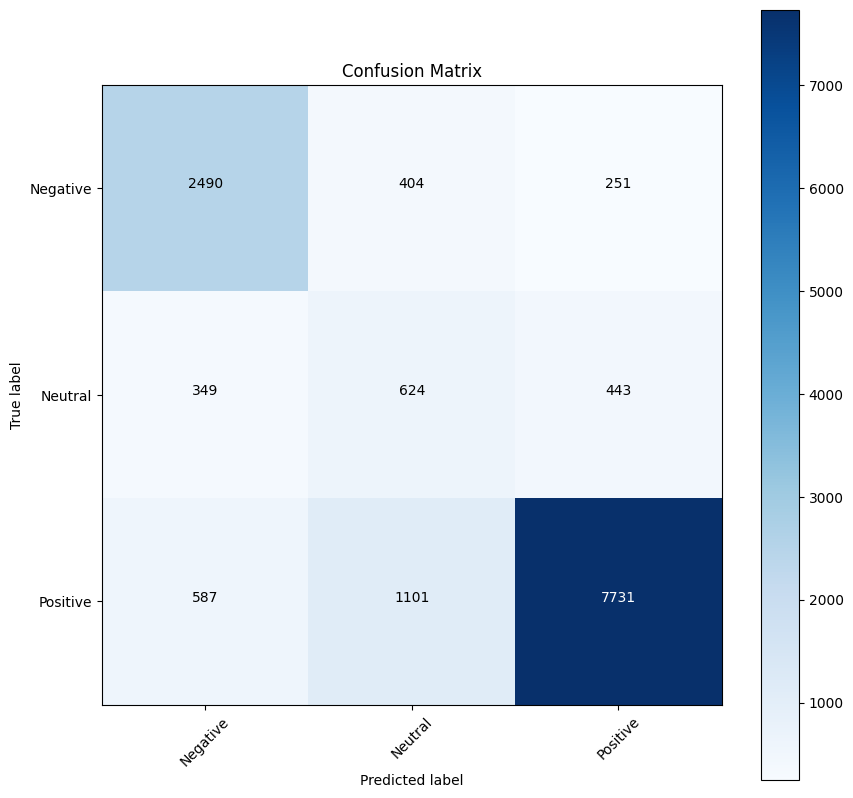

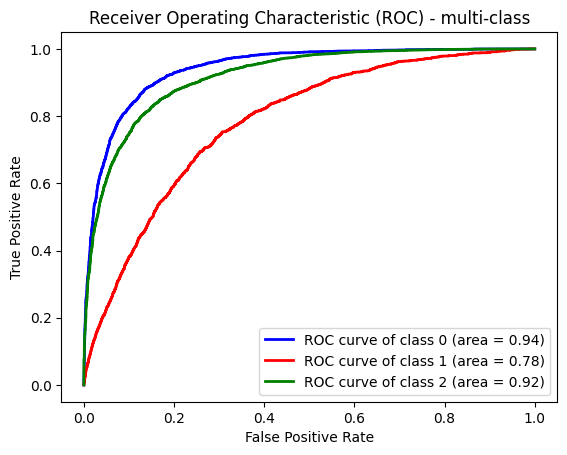

Configuration:
  Model Type: roberta-gru
  Learning Rate: 2e-05
  Training Batch Size: 32
  Validation Batch Size: 64
  Epochs: 3
  Unfreeze Layers: None

Picking Robert-GRU Model


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 437/437 [00:59<00:00,  7.31it/s]


F1 Score: 0.7881758403898731
Test Accuracy: 0.77
Per-Class Accuracy:
Accuracy for class 0: 0.8884120171673819
Accuracy for class 1: 0.828755364806867
Accuracy for class 2: 0.8248927038626609
Per-Class AUC Score:
AUC Scores for Class 0: 0.94516237565506
AUC Scores for Class 1: 0.7914045623132725
AUC Scores for Class 2: 0.922706833340243


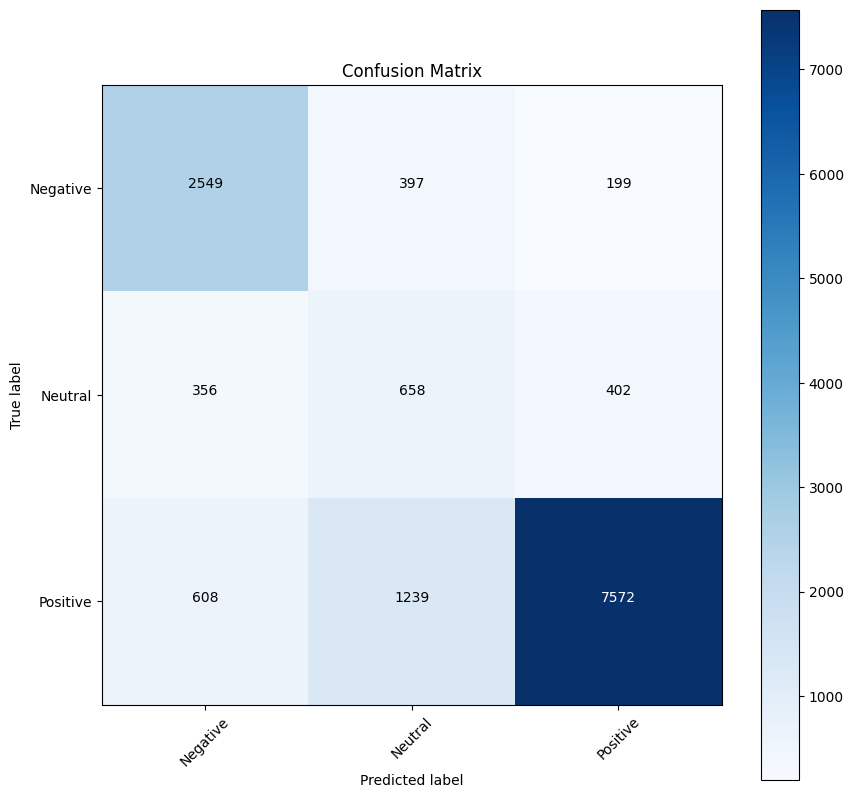

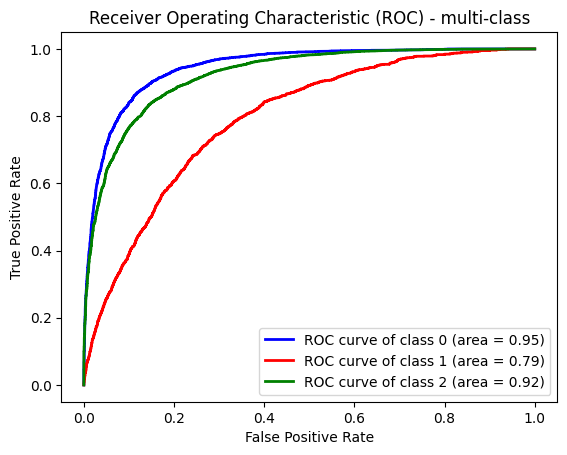

Configuration:
  Model Type: roberta-gru
  Learning Rate: 1e-05
  Training Batch Size: 16
  Validation Batch Size: 32
  Epochs: 6
  Unfreeze Layers: None

Picking Robert-GRU Model


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 437/437 [00:59<00:00,  7.32it/s]


F1 Score: 0.7959892927896922
Test Accuracy: 0.78
Per-Class Accuracy:
Accuracy for class 0: 0.8877682403433477
Accuracy for class 1: 0.8397711015736766
Accuracy for class 2: 0.8364091559370529
Per-Class AUC Score:
AUC Scores for Class 0: 0.9470175482358225
AUC Scores for Class 1: 0.795899767203219
AUC Scores for Class 2: 0.9249060156085911


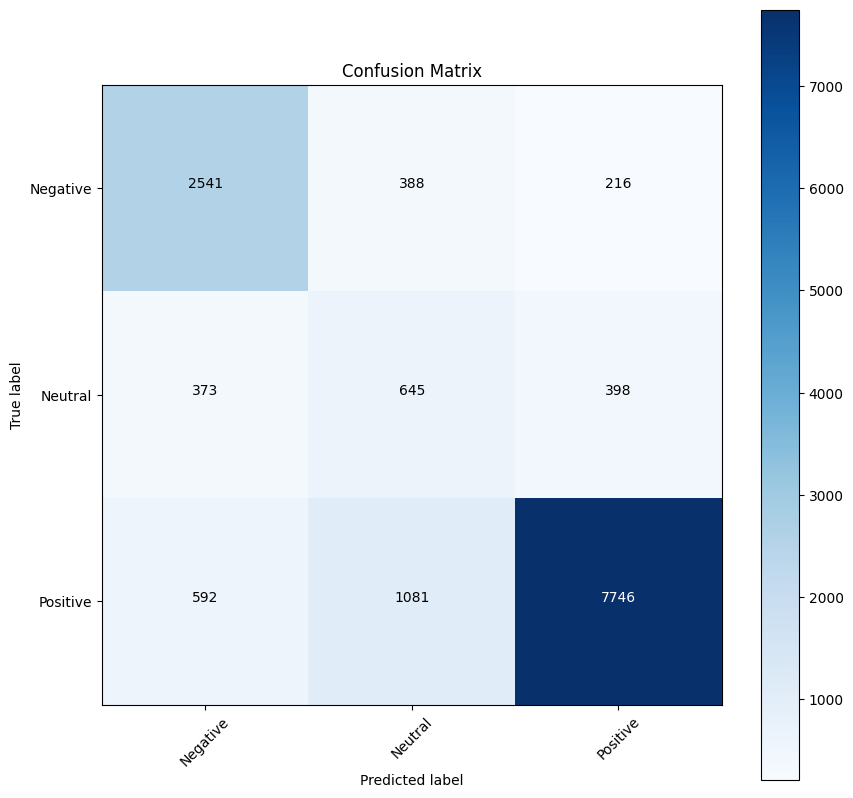

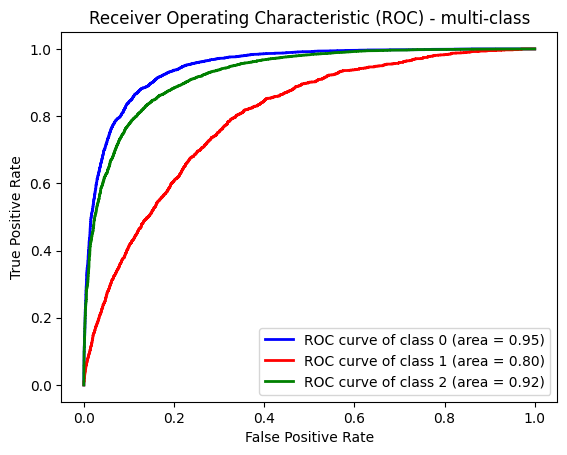

Configuration:
  Model Type: roberta-simple
  Learning Rate: 3e-05
  Training Batch Size: 32
  Validation Batch Size: 64
  Epochs: 4
  Unfreeze Layers: None

Picking Roberta Simple Classifier Model


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 437/437 [00:56<00:00,  7.67it/s]


F1 Score: 0.7612041286296926
Test Accuracy: 0.74
Per-Class Accuracy:
Accuracy for class 0: 0.8663090128755365
Accuracy for class 1: 0.8127324749642346
Accuracy for class 2: 0.7976394849785408
Per-Class AUC Score:
AUC Scores for Class 0: 0.9158291557933241
AUC Scores for Class 1: 0.7700289208517926
AUC Scores for Class 2: 0.902423877024936


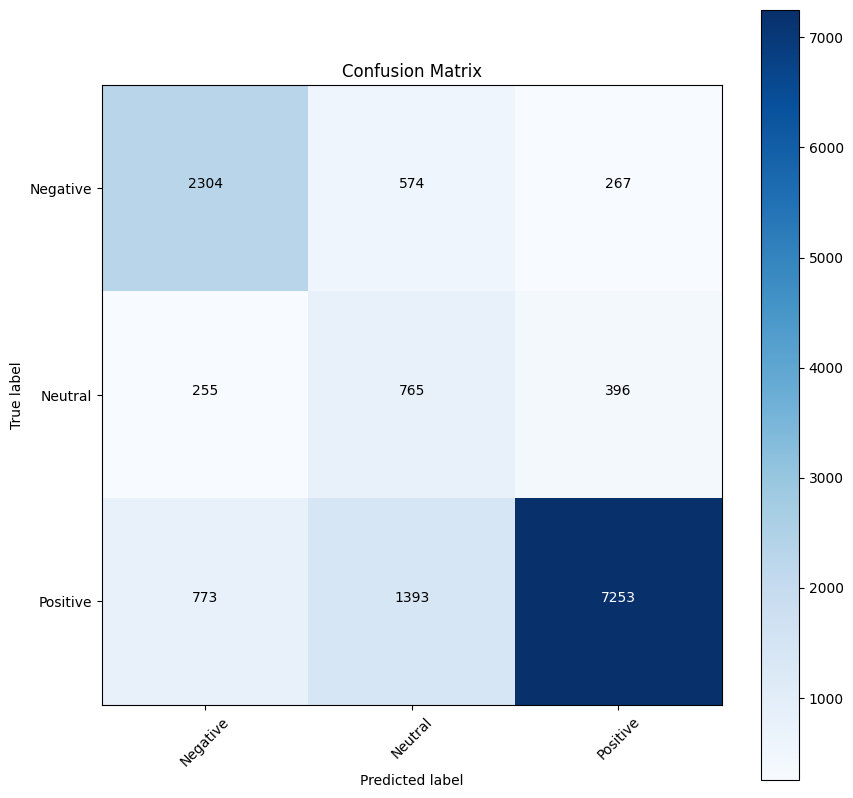

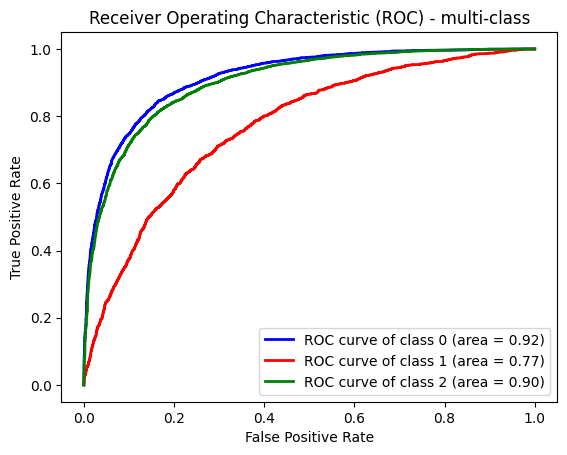

Configuration:
  Model Type: roberta-gru
  Learning Rate: 3e-05
  Training Batch Size: 32
  Validation Batch Size: 64
  Epochs: 4
  Unfreeze Layers: None

Picking Robert-GRU Model


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 437/437 [00:59<00:00,  7.33it/s]


F1 Score: 0.793099982902833
Test Accuracy: 0.77
Per-Class Accuracy:
Accuracy for class 0: 0.8913447782546495
Accuracy for class 1: 0.8245350500715307
Accuracy for class 2: 0.8316165951359085
Per-Class AUC Score:
AUC Scores for Class 0: 0.949051585313156
AUC Scores for Class 1: 0.7982377121791795
AUC Scores for Class 2: 0.9283217232080617


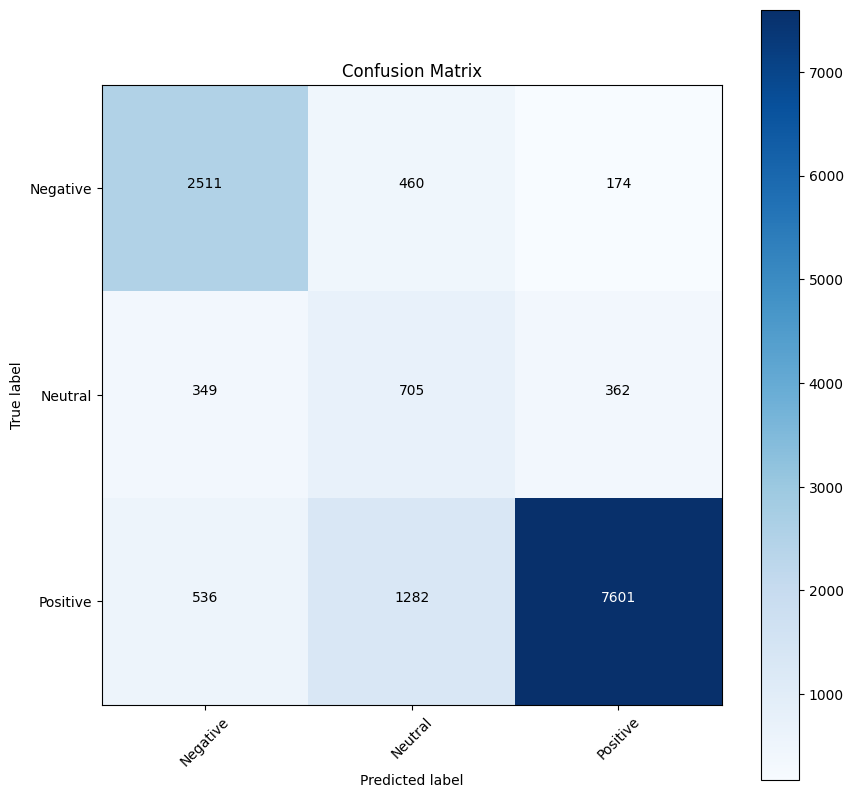

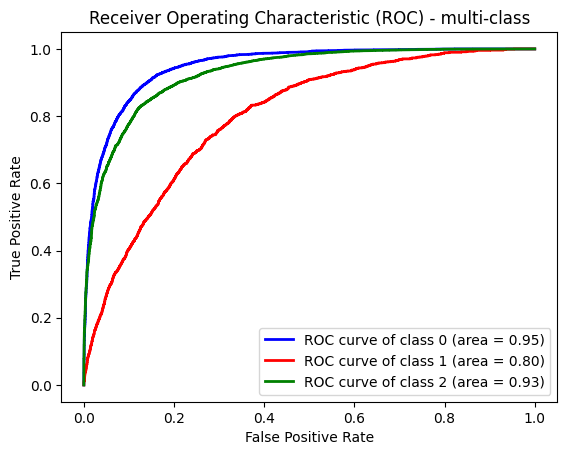

Configuration:
  Model Type: roberta-simple
  Learning Rate: 1e-05
  Training Batch Size: 64
  Validation Batch Size: 64
  Epochs: 5
  Unfreeze Layers: None

Picking Roberta Simple Classifier Model


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 437/437 [00:56<00:00,  7.67it/s]


F1 Score: 0.7107476576690938
Test Accuracy: 0.69
Per-Class Accuracy:
Accuracy for class 0: 0.8244635193133047
Accuracy for class 1: 0.8156652360515021
Accuracy for class 2: 0.7492846924177397
Per-Class AUC Score:
AUC Scores for Class 0: 0.8556655072510553
AUC Scores for Class 1: 0.7171809712801529
AUC Scores for Class 2: 0.832094644004097


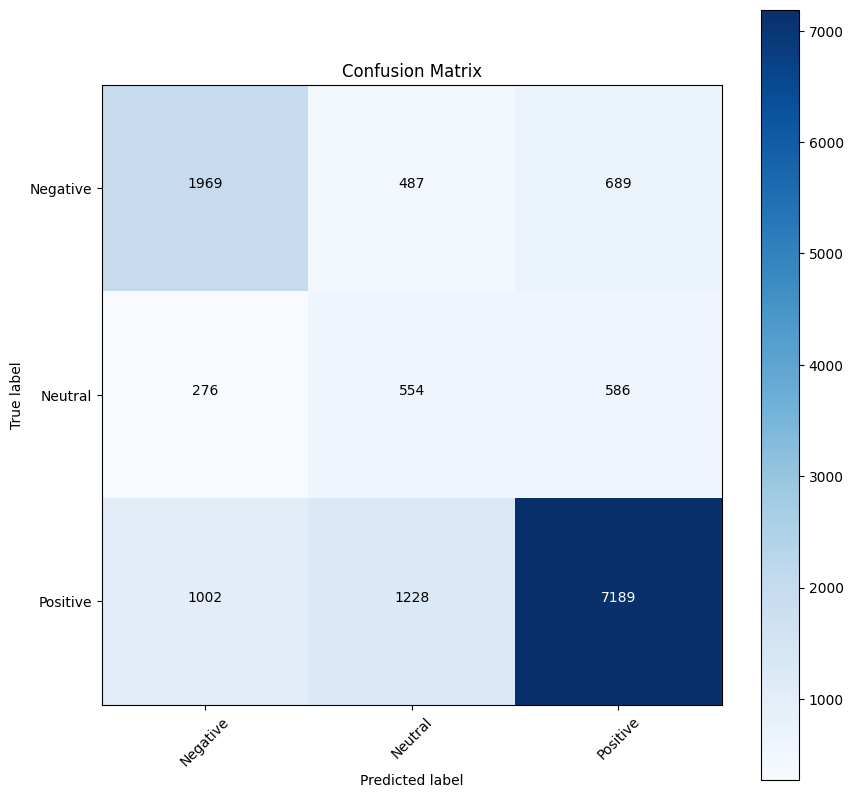

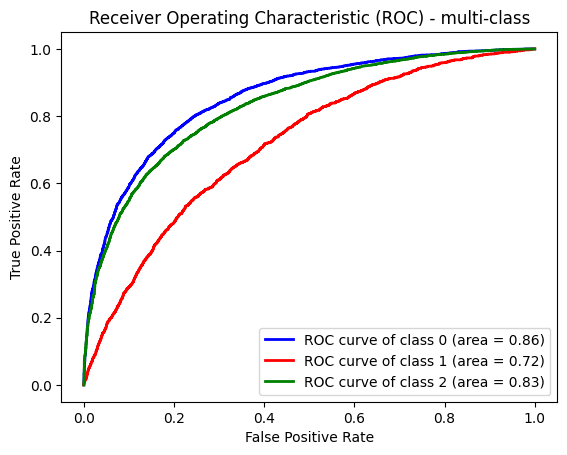

Configuration:
  Model Type: roberta-gru
  Learning Rate: 1e-05
  Training Batch Size: 64
  Validation Batch Size: 64
  Epochs: 5
  Unfreeze Layers: None

Picking Robert-GRU Model


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 437/437 [00:59<00:00,  7.31it/s]


F1 Score: 0.7840818733124146
Test Accuracy: 0.77
Per-Class Accuracy:
Accuracy for class 0: 0.8837625178826896
Accuracy for class 1: 0.8265379113018598
Accuracy for class 2: 0.8224606580829756
Per-Class AUC Score:
AUC Scores for Class 0: 0.9387795689497689
AUC Scores for Class 1: 0.7838317531751555
AUC Scores for Class 2: 0.9150193904528856


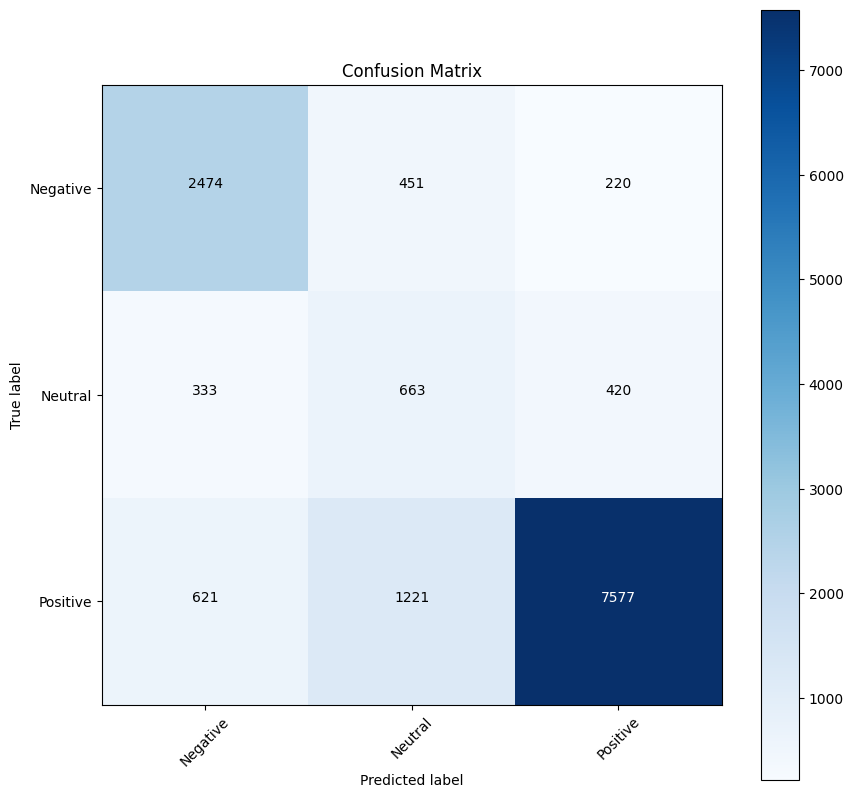

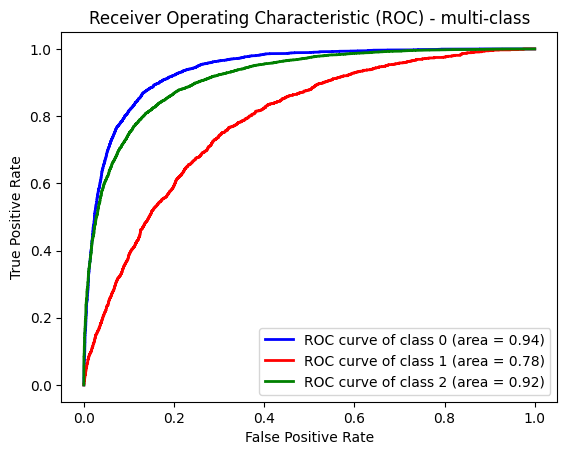

Configuration:
  Model Type: roberta-gru
  Learning Rate: 1e-05
  Training Batch Size: 32
  Validation Batch Size: 64
  Epochs: 2
  Unfreeze Layers: 6

Picking Robert-GRU Model


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 437/437 [01:00<00:00,  7.28it/s]


F1 Score: 0.8604769307535041
Test Accuracy: 0.85
Per-Class Accuracy:
Accuracy for class 0: 0.9300429184549356
Accuracy for class 1: 0.878755364806867
Accuracy for class 2: 0.8999284692417739
Per-Class AUC Score:
AUC Scores for Class 0: 0.9775002696173195
AUC Scores for Class 1: 0.8681995077856741
AUC Scores for Class 2: 0.9664819594405117


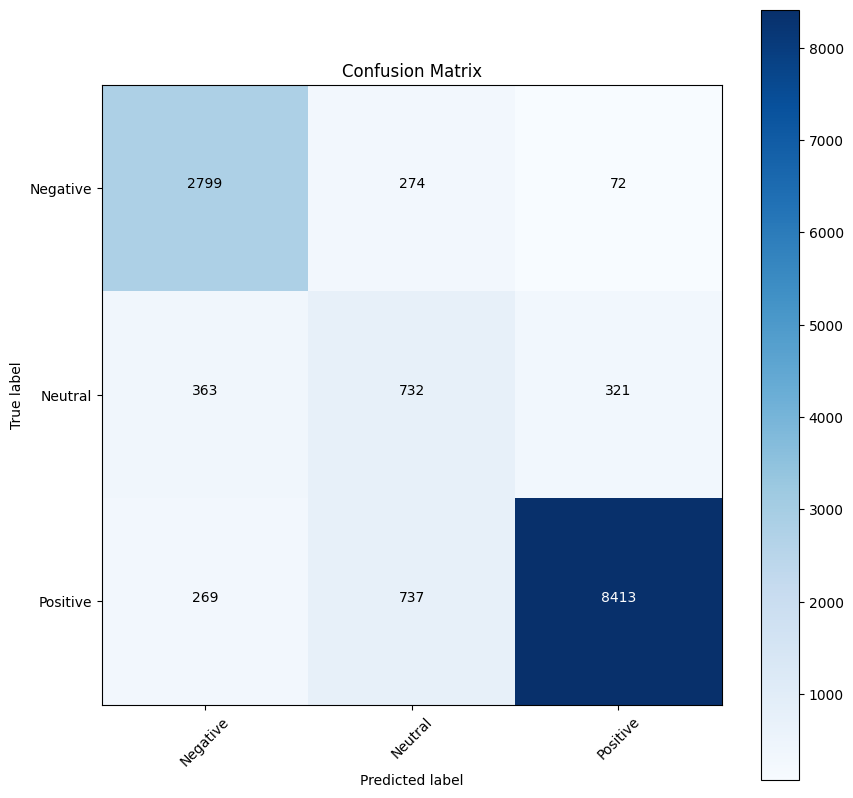

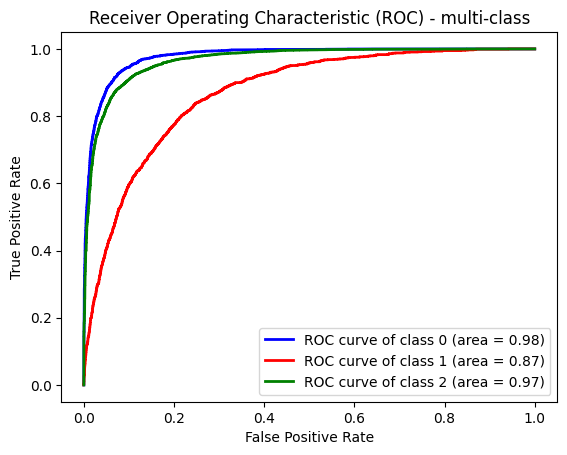

Configuration:
  Model Type: roberta-gru
  Learning Rate: 1e-05
  Training Batch Size: 32
  Validation Batch Size: 64
  Epochs: 2
  Unfreeze Layers: 12

Picking Robert-GRU Model


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 437/437 [01:00<00:00,  7.26it/s]


F1 Score: 0.8740577990063175
Test Accuracy: 0.87
Per-Class Accuracy:
Accuracy for class 0: 0.9401287553648069
Accuracy for class 1: 0.8908440629470672
Accuracy for class 2: 0.9125178826895565
Per-Class AUC Score:
AUC Scores for Class 0: 0.9832947016345045
AUC Scores for Class 1: 0.881178029505879
AUC Scores for Class 2: 0.9717301016742086


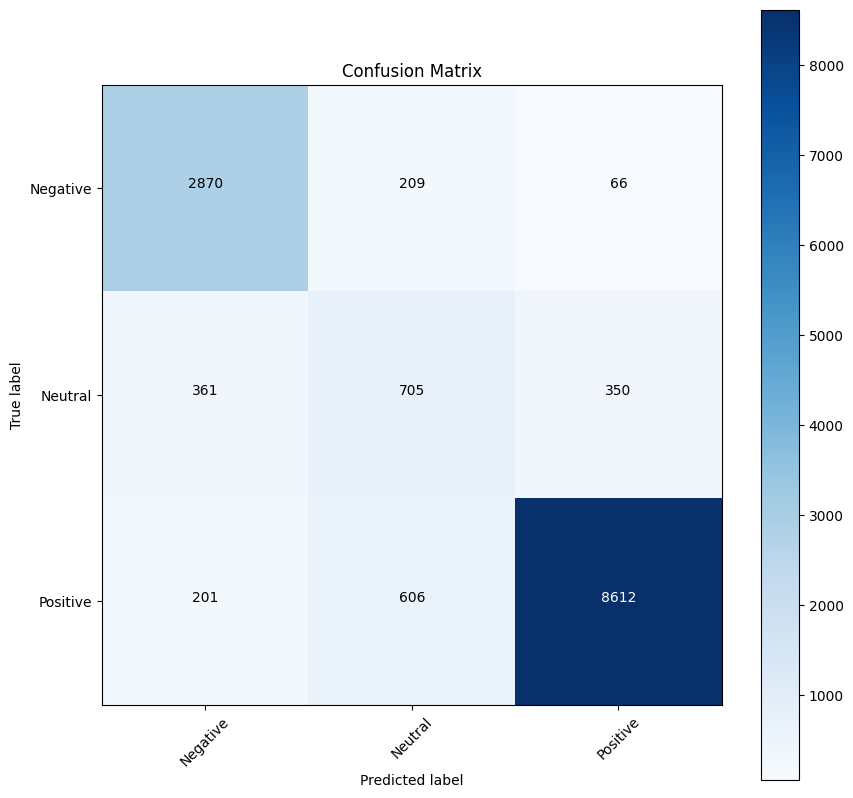

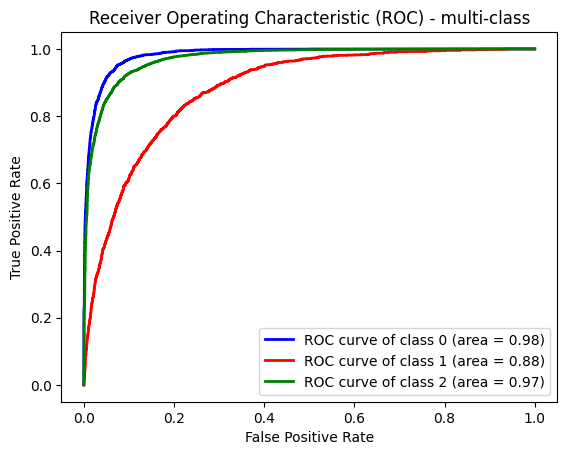

Configuration:
  Model Type: roberta-gru
  Learning Rate: 1e-05
  Training Batch Size: 32
  Validation Batch Size: 64
  Epochs: 2
  Unfreeze Layers: 6

Picking Robert-GRU Model


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 437/437 [01:00<00:00,  7.28it/s]


F1 Score: 0.8604769307535041
Test Accuracy: 0.85
Per-Class Accuracy:
Accuracy for class 0: 0.9300429184549356
Accuracy for class 1: 0.878755364806867
Accuracy for class 2: 0.8999284692417739
Per-Class AUC Score:
AUC Scores for Class 0: 0.9775002696173195
AUC Scores for Class 1: 0.8681995077856741
AUC Scores for Class 2: 0.9664819594405117


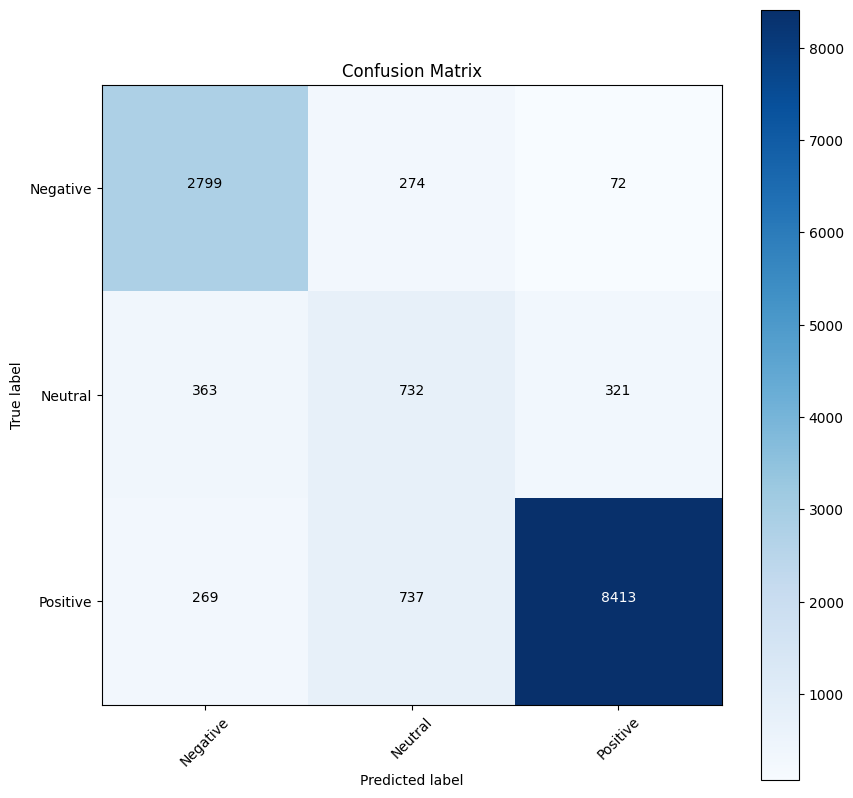

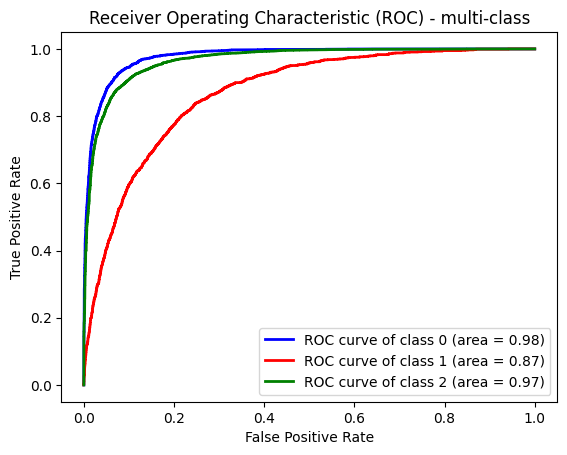

Configuration:
  Model Type: roberta-gru
  Learning Rate: 1e-05
  Training Batch Size: 32
  Validation Batch Size: 64
  Epochs: 2
  Unfreeze Layers: 12

Picking Robert-GRU Model


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 437/437 [01:00<00:00,  7.26it/s]


F1 Score: 0.8740577990063175
Test Accuracy: 0.87
Per-Class Accuracy:
Accuracy for class 0: 0.9401287553648069
Accuracy for class 1: 0.8908440629470672
Accuracy for class 2: 0.9125178826895565
Per-Class AUC Score:
AUC Scores for Class 0: 0.9832947016345045
AUC Scores for Class 1: 0.881178029505879
AUC Scores for Class 2: 0.9717301016742086


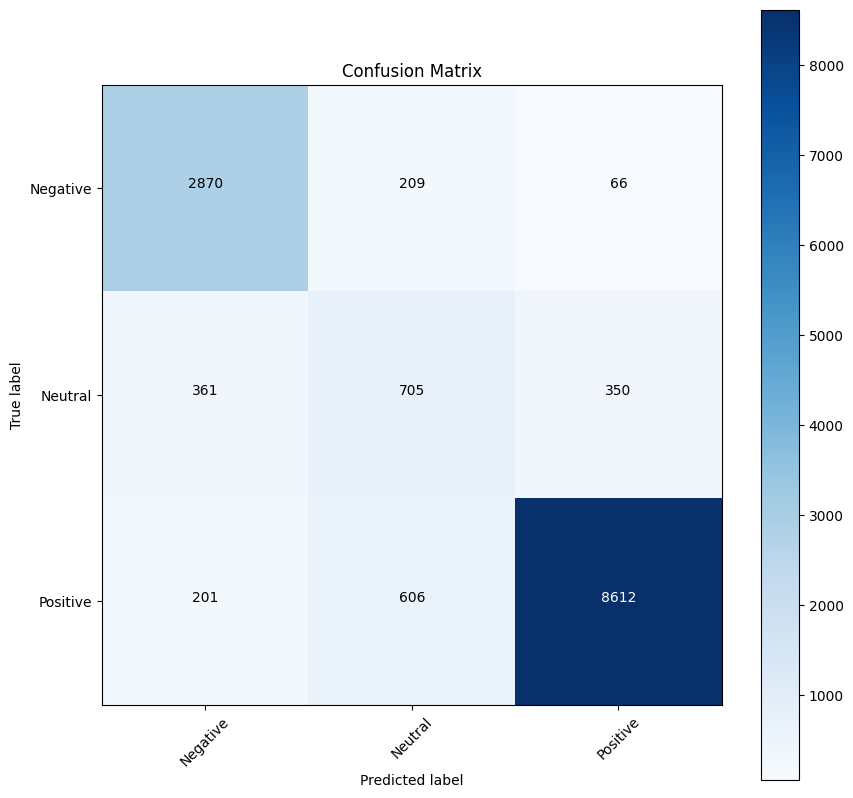

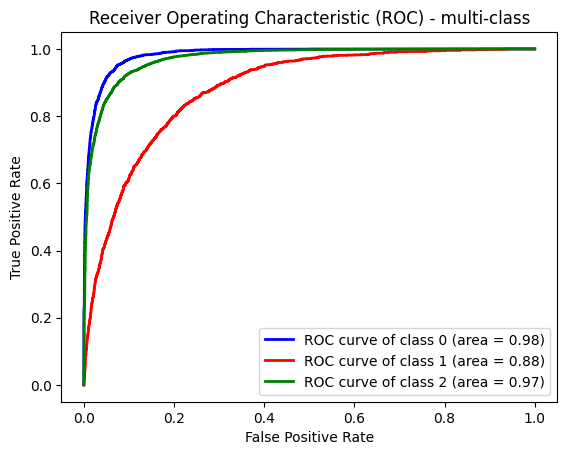

In [43]:
for config in configs:
    config.pretty_print()
    tester = Tester(preprocessed_test_dataset,config)
    tester.run_test()

In [46]:
configs = [
    Config(1e-5, 32,64, 2, 'roberta-simple', unfreeze_layers=6),
    Config(1e-5, 32,64, 2, 'roberta-simple', unfreeze_layers=12)
]

Configuration:
  Model Type: roberta-simple
  Learning Rate: 1e-05
  Training Batch Size: 32
  Validation Batch Size: 64
  Epochs: 2
  Unfreeze Layers: 6

Picking Roberta Simple Classifier Model


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 437/437 [00:57<00:00,  7.66it/s]


F1 Score: 0.854017451572303
Test Accuracy: 0.84
Per-Class Accuracy:
Accuracy for class 0: 0.9271101573676681
Accuracy for class 1: 0.871244635193133
Accuracy for class 2: 0.8913447782546495
Per-Class AUC Score:
AUC Scores for Class 0: 0.9764079636519172
AUC Scores for Class 1: 0.8630200098658709
AUC Scores for Class 2: 0.9646992337696744


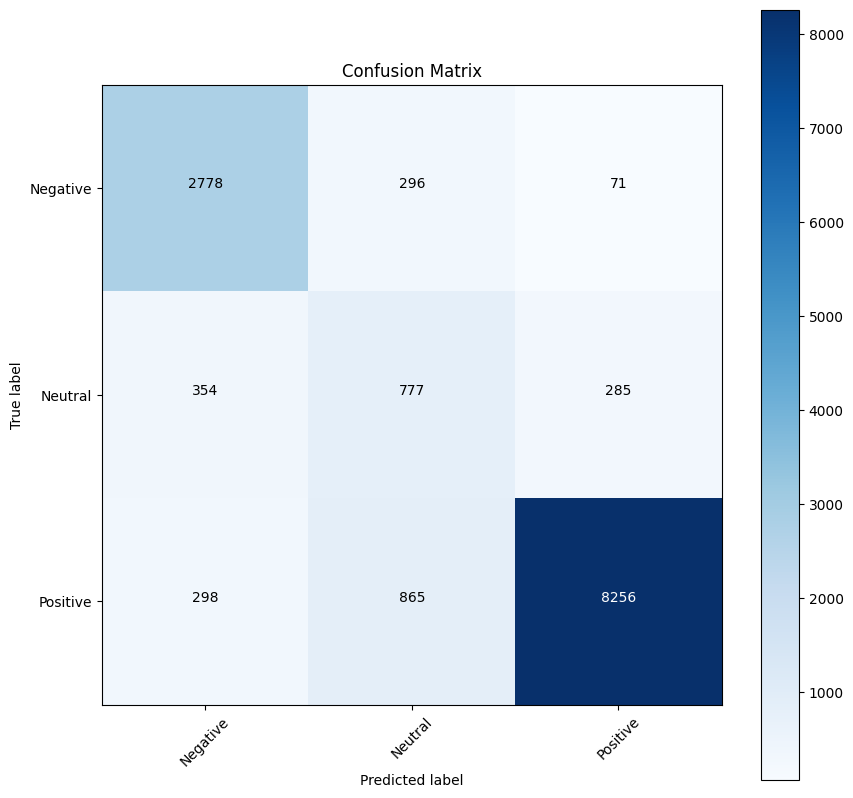

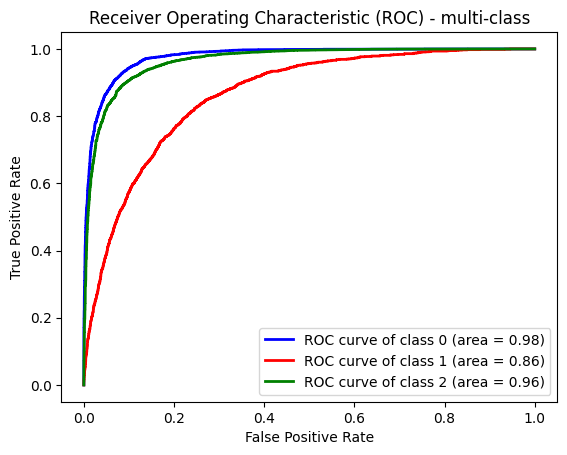

Configuration:
  Model Type: roberta-simple
  Learning Rate: 1e-05
  Training Batch Size: 32
  Validation Batch Size: 64
  Epochs: 2
  Unfreeze Layers: 12

Picking Roberta Simple Classifier Model


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 437/437 [00:57<00:00,  7.65it/s]


F1 Score: 0.8680268866269577
Test Accuracy: 0.86
Per-Class Accuracy:
Accuracy for class 0: 0.9368383404864091
Accuracy for class 1: 0.8794706723891274
Accuracy for class 2: 0.9055793991416309
Per-Class AUC Score:
AUC Scores for Class 0: 0.9820122769421066
AUC Scores for Class 1: 0.8759748955404824
AUC Scores for Class 2: 0.9710410313915072


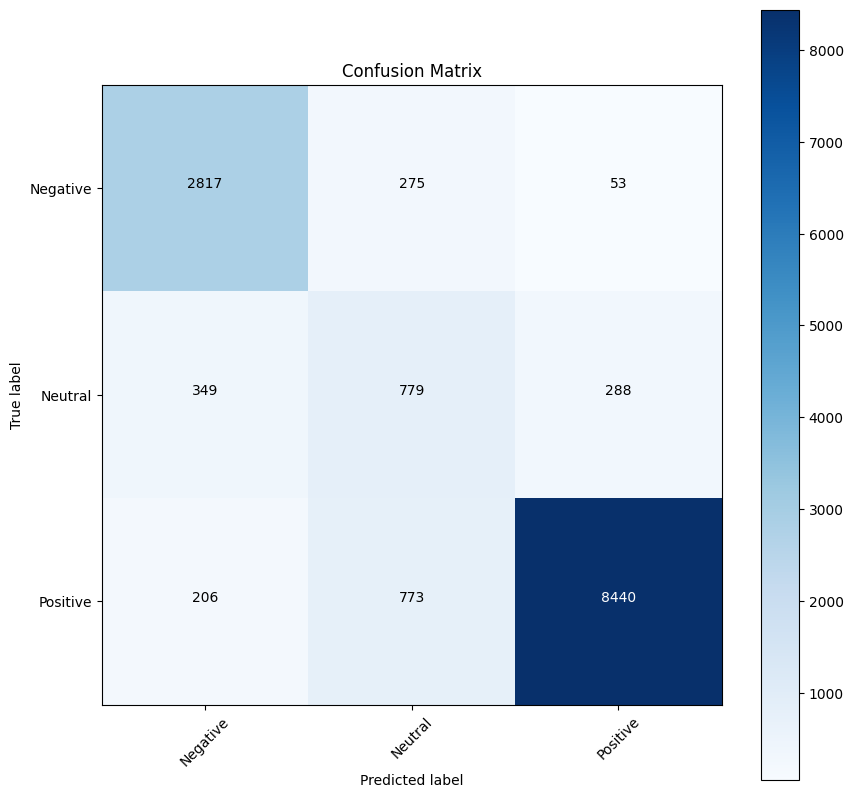

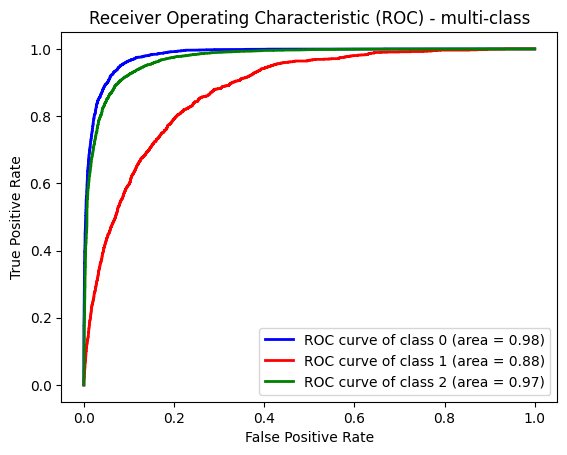

In [47]:
for config in configs:
    config.pretty_print()
    tester = Tester(preprocessed_test_dataset,config)
    tester.run_test()

# Hyperparameter Tuning Analysis

The table below presents a comprehensive overview of hyperparameter tuning results from a grid search performed on a sentiment analysis task. The configurations explore combinations of different learning rates, batch sizes, and epoch counts, along with a distinction between two model architectures: `roberta-simple` and `roberta-gru`. Additionally, some configurations experiment with unfreezing layers during training, which can lead to significant performance differences.

| No. | Model Type                          | Learning Rate | Train BS | Val BS | Epochs | Unfreeze Layers | F1 Score | Test Acc. |
|-----|------------------------------------|---------------|----------|--------|--------|-----------------|----------|-----------|
| 1   | roberta-simple                     | 1e-05         | 16       | 32     | 3      | None            | 0.72864  | 0.71      |
| 2   | roberta-simple                     | 2e-05         | 32       | 64     | 3      | None            | 0.73189  | 0.71      |
| 3   | roberta-simple                     | 1e-05         | 16       | 32     | 6      | None            | 0.76558  | 0.75      |
| 4   | roberta-gru                        | 1e-05         | 16       | 32     | 3      | None            | 0.78996  | 0.78      |
| 5   | roberta-gru                        | 2e-05         | 32       | 64     | 3      | None            | 0.78818  | 0.77      |
| 6   | roberta-gru                        | 1e-05         | 16       | 32     | 6      | None            | 0.79599  | 0.78      |
| 7   | roberta-simple                     | 3e-05         | 32       | 64     | 4      | None            | 0.76120  | 0.74      |
| 8   | roberta-gru                        | 3e-05         | 32       | 64     | 4      | None            | 0.79310  | 0.77      |
| 9   | roberta-simple                     | 1e-05         | 64       | 64     | 5      | None            | 0.71075  | 0.69      |
| 10  | roberta-gru                        | 1e-05         | 64       | 64     | 5      | None            | 0.78408  | 0.77      |
| 11  | roberta-gru                        | 1e-05         | 32       | 64     | 2+8     | 6               | 0.86048  | 0.85      |
| 12  | roberta-gru                        | 1e-05         | 32       | 64     | 2+8   | 12              | 0.87406  | 0.87      |
| 13  | roberta-simple                        | 1e-05         | 32       | 64     | 2+8    | 6               | 0.8504  | 0.84      |
| 14  | roberta-simple                        | 1e-05         | 32       | 64     | 2+8    | 12              | 0.86406  | 0.86      |

From the results, it is evident that both model types benefit from a fine-tuned learning rate of `1e-05`, which consistently yields higher F1 scores across various configurations. The `roberta-gru` model shows a marked improvement in performance when the number of epochs is increased and layers are unfrozen, with the F1 score reaching as high as `0.87406` and test accuracy peaking at `0.87`.

The batch size appears to have a less consistent impact on performance, but larger batch sizes combined with a higher number of epochs and layer unfreezing tend to produce better results. For instance, configuration 12, which uses the `roberta-gru` model with 12 layers unfrozen and an extended training period (`2+8` epochs), achieves the highest F1 score and test accuracy.

Given the data, the optimal hyperparameters for this specific sentiment analysis task appear to be:
- **Model Type**: `roberta-gru`
- **Learning Rate**: `1e-05`
- **Training Batch Size**: `32`
- **Validation Batch Size**: `64`
- **Epochs**: `10` (which could be interpreted as `2+8` based on the given configurations)
- **Unfreeze Layers**: `12`

The decision to unfreeze 12 layers indicates that allowing more flexibility in the pre-trained model's parameters significantly contributes to the model's ability to learn from the domain-specific data.

Overall, the `roberta-gru` architecture with carefully chosen hyperparameters and a strategy that involves unfreezing layers offers a robust approach for improving sentiment analysis performance on the given dataset.


## Training on entire dataset

### Training Experiment 1: Training with Balanced Dataset
Following roberta model configuration is used:
1. Dataset used is balanced. Minority classes are augmented to a size of 50000 and majority class is downsampled to 50000.
3. Learning Rate = $3e^{-5}$
4. Max Sequence Length = 256
5. Epoch Size = 2(when training with pretrained model freezed weights) + 8(when training with pretrained model unfreezed weights)
6. Training Batch Size = 32
7. Validation Batch Size = 16
8. AdamW Optimizer
9. Categorical Cross Entropy Loss Function

In [65]:
configs = [
    Config(1e-5, 32,16, 2, 'roberta-gru', unfreeze_layers=12)
]
for config in configs:
    config.pretty_print()
    trainer = Trainer(config,MODEL_BASE_PATH,balanced_preprocessed_dataset)
    trainer.run()
training_accuracies = trainer.training_accuracies
validation_accuracies = trainer.validation_accuracies
training_losses = trainer.training_losses

Configuration:
  Model Type: roberta-gru
  Learning Rate: 3e-05
  Training Batch Size: 32
  Validation Batch Size: 16
  Epochs: 2
  Unfreeze Layers: 12

Picking Robert-GRU Model


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Loss: 0.6809,Accuracy: 0.7043: 100%|██████████| 4219/4219 [10:52<00:00,  6.47Batch/s]
2023-12-12 20:23:48,793 - INFO - Epoch 1/2, Train Loss: 0.6809, Train Accuracy: 0.7043
INFO:trainer_roberta-gru_20231212_201254:Epoch 1/2, Train Loss: 0.6809, Train Accuracy: 0.7043
100%|██████████| 938/938 [01:10<00:00, 13.34it/s]
2023-12-12 20:24:59,220 - INFO - Validation - Epoch: 0 Accuracy: 73.12666666666667%
INFO:trainer_roberta-gru_20231212_201254:Validation - Epoch: 0 Accuracy: 73.12666666666667%


/content/drive/MyDrive/Models/model_roberta-gru_lr3e-05_bs32_ep2_unfreeze12.pt


Loss: 0.6156,Accuracy: 0.7372: 100%|██████████| 4219/4219 [10:50<00:00,  6.49Batch/s]
2023-12-12 20:35:51,104 - INFO - Epoch 2/2, Train Loss: 0.6156, Train Accuracy: 0.7372
INFO:trainer_roberta-gru_20231212_201254:Epoch 2/2, Train Loss: 0.6156, Train Accuracy: 0.7372
100%|██████████| 938/938 [01:10<00:00, 13.22it/s]
2023-12-12 20:37:02,171 - INFO - Validation - Epoch: 1 Accuracy: 73.66%
INFO:trainer_roberta-gru_20231212_201254:Validation - Epoch: 1 Accuracy: 73.66%


/content/drive/MyDrive/Models/model_roberta-gru_lr3e-05_bs32_ep2_unfreeze12.pt
Unfreezing last 12 layers of RoBERTa.


Loss: 0.3994,Accuracy: 0.8371: 100%|██████████| 4219/4219 [29:00<00:00,  2.42Batch/s]
2023-12-12 21:06:04,255 - INFO - Epoch 1/2, Train Loss: 0.3994, Train Accuracy: 0.8371
INFO:trainer_roberta-gru_20231212_201254:Epoch 1/2, Train Loss: 0.3994, Train Accuracy: 0.8371
100%|██████████| 938/938 [01:10<00:00, 13.29it/s]
2023-12-12 21:07:14,916 - INFO - Validation - Epoch: 0 Accuracy: 86.48666666666666%
INFO:trainer_roberta-gru_20231212_201254:Validation - Epoch: 0 Accuracy: 86.48666666666666%


/content/drive/MyDrive/Models/model_roberta-gru_lr3e-05_bs32_ep2_unfreeze12.pt


Loss: 0.2881,Accuracy: 0.8847: 100%|██████████| 4219/4219 [29:04<00:00,  2.42Batch/s]
2023-12-12 21:36:22,081 - INFO - Epoch 2/2, Train Loss: 0.2881, Train Accuracy: 0.8847
INFO:trainer_roberta-gru_20231212_201254:Epoch 2/2, Train Loss: 0.2881, Train Accuracy: 0.8847
100%|██████████| 938/938 [01:09<00:00, 13.41it/s]
2023-12-12 21:37:32,100 - INFO - Validation - Epoch: 1 Accuracy: 87.64666666666666%
INFO:trainer_roberta-gru_20231212_201254:Validation - Epoch: 1 Accuracy: 87.64666666666666%


/content/drive/MyDrive/Models/model_roberta-gru_lr3e-05_bs32_ep2_unfreeze12.pt


Loss: 0.2398,Accuracy: 0.9049: 100%|██████████| 4219/4219 [29:01<00:00,  2.42Batch/s]
2023-12-12 22:06:35,347 - INFO - Epoch 3/2, Train Loss: 0.2398, Train Accuracy: 0.9049
INFO:trainer_roberta-gru_20231212_201254:Epoch 3/2, Train Loss: 0.2398, Train Accuracy: 0.9049
100%|██████████| 938/938 [01:09<00:00, 13.43it/s]
2023-12-12 22:07:45,267 - INFO - Validation - Epoch: 2 Accuracy: 87.64666666666666%
INFO:trainer_roberta-gru_20231212_201254:Validation - Epoch: 2 Accuracy: 87.64666666666666%


/content/drive/MyDrive/Models/model_roberta-gru_lr3e-05_bs32_ep2_unfreeze12.pt


Loss: 0.2401,Accuracy: 0.9045: 100%|██████████| 4219/4219 [29:02<00:00,  2.42Batch/s]
2023-12-12 22:36:49,376 - INFO - Epoch 4/2, Train Loss: 0.2401, Train Accuracy: 0.9045
INFO:trainer_roberta-gru_20231212_201254:Epoch 4/2, Train Loss: 0.2401, Train Accuracy: 0.9045
100%|██████████| 938/938 [01:09<00:00, 13.43it/s]
2023-12-12 22:37:59,338 - INFO - Validation - Epoch: 3 Accuracy: 87.66666666666667%
INFO:trainer_roberta-gru_20231212_201254:Validation - Epoch: 3 Accuracy: 87.66666666666667%


/content/drive/MyDrive/Models/model_roberta-gru_lr3e-05_bs32_ep2_unfreeze12.pt


Loss: 0.2401,Accuracy: 0.9052: 100%|██████████| 4219/4219 [29:07<00:00,  2.41Batch/s]
2023-12-12 23:07:08,908 - INFO - Epoch 5/2, Train Loss: 0.2401, Train Accuracy: 0.9052
INFO:trainer_roberta-gru_20231212_201254:Epoch 5/2, Train Loss: 0.2401, Train Accuracy: 0.9052
100%|██████████| 938/938 [01:10<00:00, 13.38it/s]
2023-12-12 23:08:19,085 - INFO - Validation - Epoch: 4 Accuracy: 87.66000000000001%
INFO:trainer_roberta-gru_20231212_201254:Validation - Epoch: 4 Accuracy: 87.66000000000001%


/content/drive/MyDrive/Models/model_roberta-gru_lr3e-05_bs32_ep2_unfreeze12.pt


Loss: 0.2401,Accuracy: 0.9047: 100%|██████████| 4219/4219 [29:07<00:00,  2.41Batch/s]
2023-12-12 23:37:28,239 - INFO - Epoch 6/2, Train Loss: 0.2401, Train Accuracy: 0.9047
INFO:trainer_roberta-gru_20231212_201254:Epoch 6/2, Train Loss: 0.2401, Train Accuracy: 0.9047
100%|██████████| 938/938 [01:10<00:00, 13.25it/s]
2023-12-12 23:38:39,151 - INFO - Validation - Epoch: 5 Accuracy: 87.67333333333333%
INFO:trainer_roberta-gru_20231212_201254:Validation - Epoch: 5 Accuracy: 87.67333333333333%


/content/drive/MyDrive/Models/model_roberta-gru_lr3e-05_bs32_ep2_unfreeze12.pt


Loss: 0.2399,Accuracy: 0.9043: 100%|██████████| 4219/4219 [29:11<00:00,  2.41Batch/s]
2023-12-13 00:07:51,873 - INFO - Epoch 7/2, Train Loss: 0.2399, Train Accuracy: 0.9043
INFO:trainer_roberta-gru_20231212_201254:Epoch 7/2, Train Loss: 0.2399, Train Accuracy: 0.9043
100%|██████████| 938/938 [01:10<00:00, 13.29it/s]
2023-12-13 00:09:02,573 - INFO - Validation - Epoch: 6 Accuracy: 87.68%
INFO:trainer_roberta-gru_20231212_201254:Validation - Epoch: 6 Accuracy: 87.68%


/content/drive/MyDrive/Models/model_roberta-gru_lr3e-05_bs32_ep2_unfreeze12.pt


Loss: 0.2394,Accuracy: 0.9051: 100%|██████████| 4219/4219 [29:09<00:00,  2.41Batch/s]
2023-12-13 00:38:14,153 - INFO - Epoch 8/2, Train Loss: 0.2394, Train Accuracy: 0.9051
INFO:trainer_roberta-gru_20231212_201254:Epoch 8/2, Train Loss: 0.2394, Train Accuracy: 0.9051
100%|██████████| 938/938 [01:10<00:00, 13.32it/s]
2023-12-13 00:39:24,684 - INFO - Validation - Epoch: 7 Accuracy: 87.65333333333334%
INFO:trainer_roberta-gru_20231212_201254:Validation - Epoch: 7 Accuracy: 87.65333333333334%


/content/drive/MyDrive/Models/model_roberta-gru_lr3e-05_bs32_ep2_unfreeze12.pt


## Training loss vs Epoch Graph and Training Accuracy vs Validation Accuracy Plot

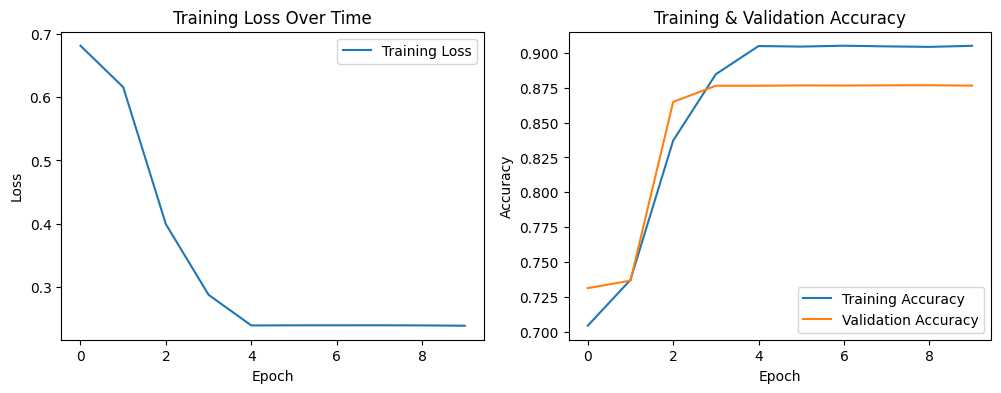

In [66]:
import matplotlib.pyplot as plt


# Plotting the metrics
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(training_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracies, label='Training Accuracy')
plt.plot(validation_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()

## Experiment 2: Training Without Balanced Dataset
Following roberta model configuration is used:
1. Learning Rate = $3e^{-4}$ (when training with pretrained model freezed weights)
2. Learning Rate = $3e^{-5}$ (when training with pretrained model unfreezed weights)
3. Max Sequence Length = 256
4. Epoch Size = 2(when training with pretrained model freezed weights) + 8(when training with pretrained model unfreezed weights)
5. Training Batch Size = 32
6. Validation Batch Size = 16
7. AdamW Optimizer
8. Categorical Cross Entropy Loss Function

In [ ]:
configs = [
    Config(3e-5, 32,16, 2, 'roberta-gru', unfreeze_layers=12)
]
for config in configs:
    config.pretty_print()
    trainer = Trainer(config,MODEL_BASE_PATH,preprocessed_train_dataset)
    trainer.run()
training_accuracies = trainer.training_accuracies
validation_accuracies = trainer.validation_accuracies
training_losses = trainer.training_losses

Preprocessing data...
Preprocessing Dataset...
1. Removing punctuations


100%|██████████| 174757/174757 [00:04<00:00, 43386.00it/s]


2. Converting text to lower case


100%|██████████| 174757/174757 [00:00<00:00, 506955.04it/s]


3. Removing Stop Words
Stopwords already downloaded.


100%|██████████| 174757/174757 [00:30<00:00, 5639.49it/s]


4. Converting to stars to sentiment


100%|██████████| 174757/174757 [00:00<00:00, 1017415.80it/s]


5. Enconding sentiments to 0, 1, 2 (Positive, Negative, Neutral)
Preprocessing done!
Picking Robert-GRU Model


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Loss: 0.4201,Accuracy: 0.8392: 100%|██████████| 4916/4916 [12:37<00:00,  6.49Batch/s]


Epoch 1/2, Train Loss: 0.4201, Train Accuracy: 0.8392



100%|██████████| 1093/1093 [01:20<00:00, 13.50it/s]


Validation - Epoch: 0 Accuracy: 85.88349736781872%


Loss: 0.3719,Accuracy: 0.8572: 100%|██████████| 4916/4916 [12:37<00:00,  6.49Batch/s]


Epoch 2/2, Train Loss: 0.3719, Train Accuracy: 0.8572



100%|██████████| 1093/1093 [01:21<00:00, 13.49it/s]


Validation - Epoch: 1 Accuracy: 87.04509040970474%
Unfreezing last 12 layers of RoBERTa.


Loss: 0.3177,Accuracy: 0.8782: 100%|██████████| 4916/4916 [33:51<00:00,  2.42Batch/s]


Epoch 1/2, Train Loss: 0.3177, Train Accuracy: 0.8782



100%|██████████| 1093/1093 [01:21<00:00, 13.47it/s]


Validation - Epoch: 0 Accuracy: 88.78461890592813%


Loss: 0.2811,Accuracy: 0.8926: 100%|██████████| 4916/4916 [33:52<00:00,  2.42Batch/s]


Epoch 2/2, Train Loss: 0.2811, Train Accuracy: 0.8926



100%|██████████| 1093/1093 [01:21<00:00, 13.47it/s]


Validation - Epoch: 1 Accuracy: 89.43121995880064%


Loss: 0.2718,Accuracy: 0.8964: 100%|██████████| 4916/4916 [33:51<00:00,  2.42Batch/s]


Epoch 3/2, Train Loss: 0.2718, Train Accuracy: 0.8964



100%|██████████| 1093/1093 [01:21<00:00, 13.46it/s]


Validation - Epoch: 2 Accuracy: 89.41977569237812%


Loss: 0.2715,Accuracy: 0.8961: 100%|██████████| 4916/4916 [33:51<00:00,  2.42Batch/s]


Epoch 4/2, Train Loss: 0.2715, Train Accuracy: 0.8961



100%|██████████| 1093/1093 [01:21<00:00, 13.36it/s]


Validation - Epoch: 3 Accuracy: 89.4369420920119%


Loss: 0.2707,Accuracy: 0.8965: 100%|██████████| 4916/4916 [33:52<00:00,  2.42Batch/s]


Epoch 5/2, Train Loss: 0.2707, Train Accuracy: 0.8965



100%|██████████| 1093/1093 [01:20<00:00, 13.52it/s]


Validation - Epoch: 4 Accuracy: 89.41977569237812%


Loss: 0.2714,Accuracy: 0.8957: 100%|██████████| 4916/4916 [33:51<00:00,  2.42Batch/s]


Epoch 6/2, Train Loss: 0.2714, Train Accuracy: 0.8957



100%|██████████| 1093/1093 [01:21<00:00, 13.49it/s]


Validation - Epoch: 5 Accuracy: 89.43121995880064%


Loss: 0.2711,Accuracy: 0.8962: 100%|██████████| 4916/4916 [33:51<00:00,  2.42Batch/s]


Epoch 7/2, Train Loss: 0.2711, Train Accuracy: 0.8962



100%|██████████| 1093/1093 [01:20<00:00, 13.54it/s]


Validation - Epoch: 6 Accuracy: 89.42549782558939%


Loss: 0.2720,Accuracy: 0.8963: 100%|██████████| 4916/4916 [33:51<00:00,  2.42Batch/s]


Epoch 8/2, Train Loss: 0.2720, Train Accuracy: 0.8963



100%|██████████| 1093/1093 [01:21<00:00, 13.45it/s]


Validation - Epoch: 7 Accuracy: 89.42549782558939%


## Training loss vs Epoch Graph and Training Accuracy vs Validation Accuracy Plot

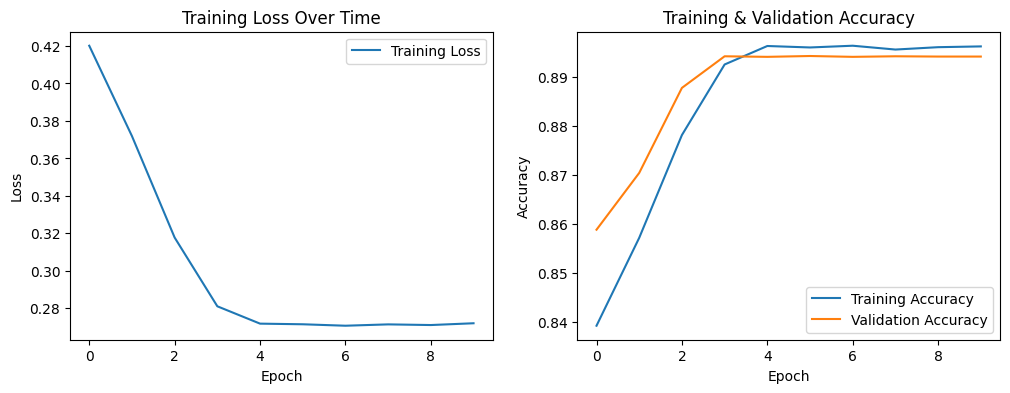

In [ ]:
import matplotlib.pyplot as plt


# Plotting the metrics
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(training_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracies, label='Training Accuracy')
plt.plot(validation_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()

In [ ]:
for config in configs:
    config.pretty_print()
    tester = Tester(preprocessed_test_dataset,config)
    tester.run_test()

Picking Robert-GRU Model


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Preprocessing Dataset...
1. Removing punctuations


100%|██████████| 13980/13980 [00:00<00:00, 41296.13it/s]


2. Converting text to lower case


100%|██████████| 13980/13980 [00:00<00:00, 519365.54it/s]


3. Removing Stop Words
Stopwords already downloaded.


100%|██████████| 13980/13980 [00:02<00:00, 5490.89it/s]


4. Converting to stars to sentiment


100%|██████████| 13980/13980 [00:00<00:00, 992978.44it/s]


5. Enconding sentiments to 0, 1, 2 (Positive, Negative, Neutral)
Preprocessing done!
13980


100%|██████████| 437/437 [01:00<00:00,  7.23it/s]

F1 Score: 0.8834094356913508
Test Accuracy: 0.89
Accuracy for class 0: 0.9458512160228898
Accuracy for class 1: 0.9105150214592275
Accuracy for class 2: 0.9287553648068669


### Training Experiment 2: Gradual Unfreezing of Pretrained RoBERTa Layers
Gradual unfreezing of layers upto 5 layers of roberta Encoder
Following roberta model configuration is used:
1. Learning Rate = $3e^{-5}$
2. Max Sequence Length = 256
3. Epoch Size = Total of 12
4. Training Batch Size = 32
5. Validation Batch Size = 16
6. AdamW Optimizer
7. Categorical Cross Entropy Loss Function

In [ ]:
configs = [
    Config(3e-5, 32,16, 2, 'roberta-gru', unfreeze_layers=12)
]
for config in configs:
    config.pretty_print()
    trainer = Trainer(config,MODEL_BASE_PATH,preprocessed_train_dataset)
    trainer.run()
training_accuracies = trainer.training_accuracies
validation_accuracies = trainer.validation_accuracies
training_losses = trainer.training_losses

Preprocessing data...
Picking Robert-GRU Model


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Loss: 0.6935,Accuracy: 0.6978: 100%|██████████| 563/563 [01:27<00:00,  6.46Batch/s]


Epoch 1/2, Train Loss: 0.6935, Train Accuracy: 0.6978



100%|██████████| 125/125 [00:09<00:00, 13.18it/s]


Validation - Epoch: 0 Accuracy: 73.3%


Loss: 0.6221,Accuracy: 0.7351: 100%|██████████| 563/563 [01:26<00:00,  6.47Batch/s]


Epoch 2/2, Train Loss: 0.6221, Train Accuracy: 0.7351



100%|██████████| 125/125 [00:09<00:00, 13.18it/s]


Validation - Epoch: 1 Accuracy: 73.75%
Unfreezing last 1 layers of RoBERTa.


Loss: 0.6017,Accuracy: 0.7427: 100%|██████████| 563/563 [01:36<00:00,  5.82Batch/s]



Epoch 1/2, Train Loss: 0.6017, Train Accuracy: 0.7427


100%|██████████| 125/125 [00:09<00:00, 13.26it/s]


Validation - Epoch: 0 Accuracy: 74.05000000000001%


Loss: 0.5996,Accuracy: 0.7421: 100%|██████████| 563/563 [01:36<00:00,  5.83Batch/s]


Epoch 2/2, Train Loss: 0.5996, Train Accuracy: 0.7421



100%|██████████| 125/125 [00:09<00:00, 13.26it/s]


Validation - Epoch: 1 Accuracy: 73.8%
Unfreezing last 2 layers of RoBERTa.


Loss: 0.5902,Accuracy: 0.7516: 100%|██████████| 563/563 [01:48<00:00,  5.17Batch/s]


Epoch 1/2, Train Loss: 0.5902, Train Accuracy: 0.7516



100%|██████████| 125/125 [00:09<00:00, 13.25it/s]


Validation - Epoch: 0 Accuracy: 75.4%


Loss: 0.5773,Accuracy: 0.7569: 100%|██████████| 563/563 [01:48<00:00,  5.17Batch/s]


Epoch 2/2, Train Loss: 0.5773, Train Accuracy: 0.7569



100%|██████████| 125/125 [00:09<00:00, 13.27it/s]


Validation - Epoch: 1 Accuracy: 75.05%
Unfreezing last 3 layers of RoBERTa.


Loss: 0.5622,Accuracy: 0.7606: 100%|██████████| 563/563 [02:01<00:00,  4.64Batch/s]


Epoch 1/2, Train Loss: 0.5622, Train Accuracy: 0.7606



100%|██████████| 125/125 [00:09<00:00, 13.23it/s]


Validation - Epoch: 0 Accuracy: 76.7%


Loss: 0.5460,Accuracy: 0.7716: 100%|██████████| 563/563 [02:01<00:00,  4.63Batch/s]


Epoch 2/2, Train Loss: 0.5460, Train Accuracy: 0.7716



100%|██████████| 125/125 [00:09<00:00, 13.16it/s]


Validation - Epoch: 1 Accuracy: 76.9%
Unfreezing last 4 layers of RoBERTa.


Loss: 0.5358,Accuracy: 0.7769: 100%|██████████| 563/563 [02:13<00:00,  4.21Batch/s]


Epoch 1/2, Train Loss: 0.5358, Train Accuracy: 0.7769



100%|██████████| 125/125 [00:09<00:00, 13.23it/s]


Validation - Epoch: 0 Accuracy: 77.7%


Loss: 0.5176,Accuracy: 0.7834: 100%|██████████| 563/563 [02:13<00:00,  4.20Batch/s]


Epoch 2/2, Train Loss: 0.5176, Train Accuracy: 0.7834



100%|██████████| 125/125 [00:09<00:00, 13.20it/s]


Validation - Epoch: 1 Accuracy: 78.14999999999999%
Unfreezing last 5 layers of RoBERTa.


Loss: 0.5100,Accuracy: 0.7881: 100%|██████████| 563/563 [02:26<00:00,  3.85Batch/s]


Epoch 1/2, Train Loss: 0.5100, Train Accuracy: 0.7881



100%|██████████| 125/125 [00:09<00:00, 13.18it/s]


Validation - Epoch: 0 Accuracy: 79.0%


Loss: 0.4889,Accuracy: 0.7995: 100%|██████████| 563/563 [02:26<00:00,  3.85Batch/s]


Epoch 2/2, Train Loss: 0.4889, Train Accuracy: 0.7995



100%|██████████| 125/125 [00:09<00:00, 13.22it/s]


Validation - Epoch: 1 Accuracy: 79.85%


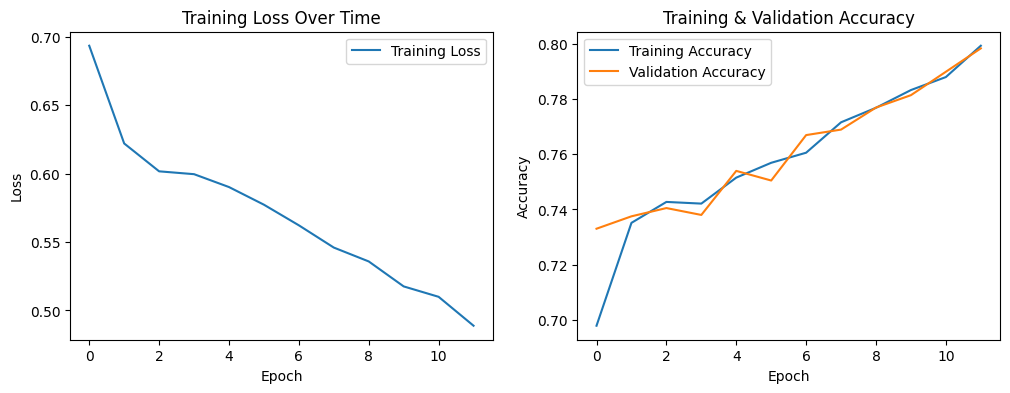

In [ ]:
import matplotlib.pyplot as plt


# Plotting the metrics
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(training_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracies, label='Training Accuracy')
plt.plot(validation_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()

In [ ]:
for config in configs:
    config.pretty_print()
    tester = Tester(preprocessed_test_dataset,config)
    tester.run_test()

Picking Robert-GRU Model


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Preprocessing Dataset...
1. Removing punctuations


100%|██████████| 13980/13980 [00:00<00:00, 44967.92it/s]


2. Converting text to lower case


100%|██████████| 13980/13980 [00:00<00:00, 476578.97it/s]


3. Removing Stop Words
Stopwords already downloaded.


100%|██████████| 13980/13980 [00:02<00:00, 5706.42it/s]


4. Converting to stars to sentiment


100%|██████████| 13980/13980 [00:00<00:00, 930824.68it/s]


5. Enconding sentiments to 0, 1, 2 (Positive, Negative, Neutral)
Preprocessing done!
13980


100%|██████████| 437/437 [01:00<00:00,  7.26it/s]

F1 Score: 0.8273615235834577
Test Accuracy: 0.81
Accuracy for class 0: 0.9167381974248927
Accuracy for class 1: 0.8382689556509298
Accuracy for class 2: 0.8640200286123033


# Result and Experiment Analysis

## With Dataset Augmentation and Balancing
In the first experiment, the dataset was balanced by downsampling the positive class to match the
average size of the other classes. The results were as follows:
- F1 Score: 0.885
- Test Accuracy: 0.88
- AUC Scores: Negative - 0.985, Neutral - 0.897, Positive - 0.975
These results indicate a balanced and effective model performance across all classes, underscoring
the benefits of dataset augmentation and balancing.

Picking Robert-GRU Model


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Preprocessing Dataset...
1. Removing punctuations


100%|██████████| 13980/13980 [00:00<00:00, 48226.65it/s]


2. Converting text to lower case


100%|██████████| 13980/13980 [00:00<00:00, 569235.41it/s]


3. Removing Stop Words
Stopwords already downloaded.


100%|██████████| 13980/13980 [00:02<00:00, 5836.12it/s]


4. Converting to stars to sentiment


100%|██████████| 13980/13980 [00:00<00:00, 898283.75it/s]


5. Enconding sentiments to 0, 1, 2 (Positive, Negative, Neutral)
Preprocessing done!
13980


100%|██████████| 437/437 [01:00<00:00,  7.26it/s]


F1 Score: 0.8850373937040122
Test Accuracy: 0.88
AUC Scores: {'Class 0 AUC': 0.9848479321635488, 'Class 1 AUC': 0.8969745524384081, 'Class 2 AUC': 0.975101430843007}


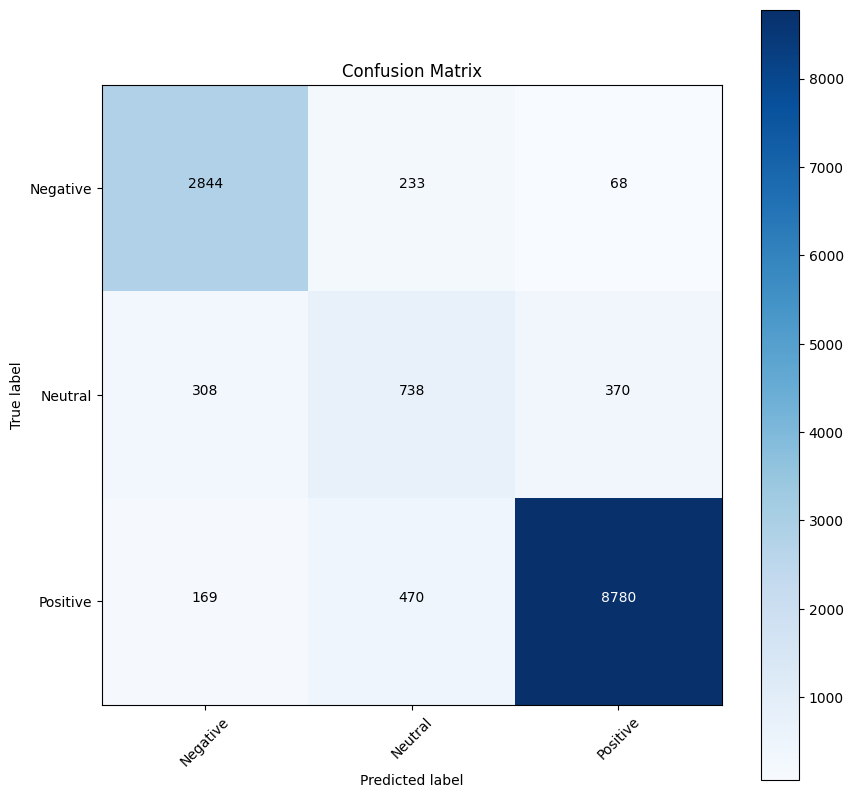

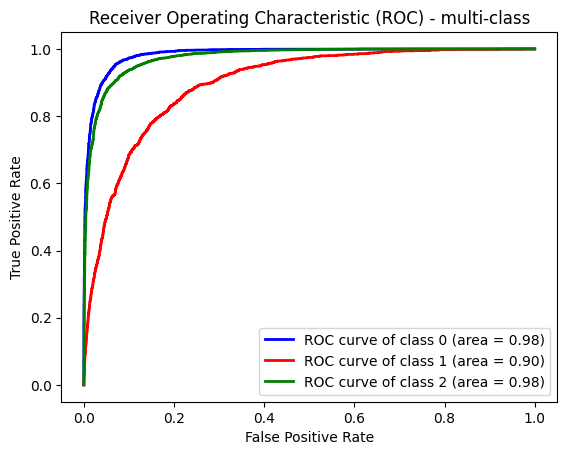

In [ ]:
configs = [
    Config(3e-5, 32,16, 2, 'roberta-gru', unfreeze_layers=12)
]
for config in configs:
    config.pretty_print()
    tester = Tester(preprocessed_test_dataset,config)
    tester.run_test()

# Experminent 2 Analysis: Without Dataset Augmentation and Balancing
The second experiment, conducted without dataset augmentation and balancing, yielded these results:
- F1 Score: 0.883
- Test Accuracy: 0.89
- AUC Scores: Negative - 0.986, Neutral - 0.902, Positive - 0.977

Despite the absence of data balancing, the model achieved a slightly higher test accuracy. However,
the F1 score was marginally lower than in the balanced dataset experiment. A key factor in this
performance is the imbalance in the test dataset, which mirrors the training dataset’s skew towards
the positive class.


Picking Robert-GRU Model


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Preprocessing Dataset...
1. Removing punctuations


100%|██████████| 13980/13980 [00:00<00:00, 47254.77it/s]


2. Converting text to lower case


100%|██████████| 13980/13980 [00:00<00:00, 402277.49it/s]


3. Removing Stop Words
Stopwords already downloaded.


100%|██████████| 13980/13980 [00:02<00:00, 5501.24it/s]


4. Converting to stars to sentiment


100%|██████████| 13980/13980 [00:00<00:00, 902778.55it/s]


5. Enconding sentiments to 0, 1, 2 (Positive, Negative, Neutral)
Preprocessing done!
13980


100%|██████████| 437/437 [01:00<00:00,  7.26it/s]


F1 Score: 0.8834094356913508
Test Accuracy: 0.89
AUC Scores: {'Class 0 AUC': 0.9855779311437717, 'Class 1 AUC': 0.9018830930269787, 'Class 2 AUC': 0.9769842494862495}


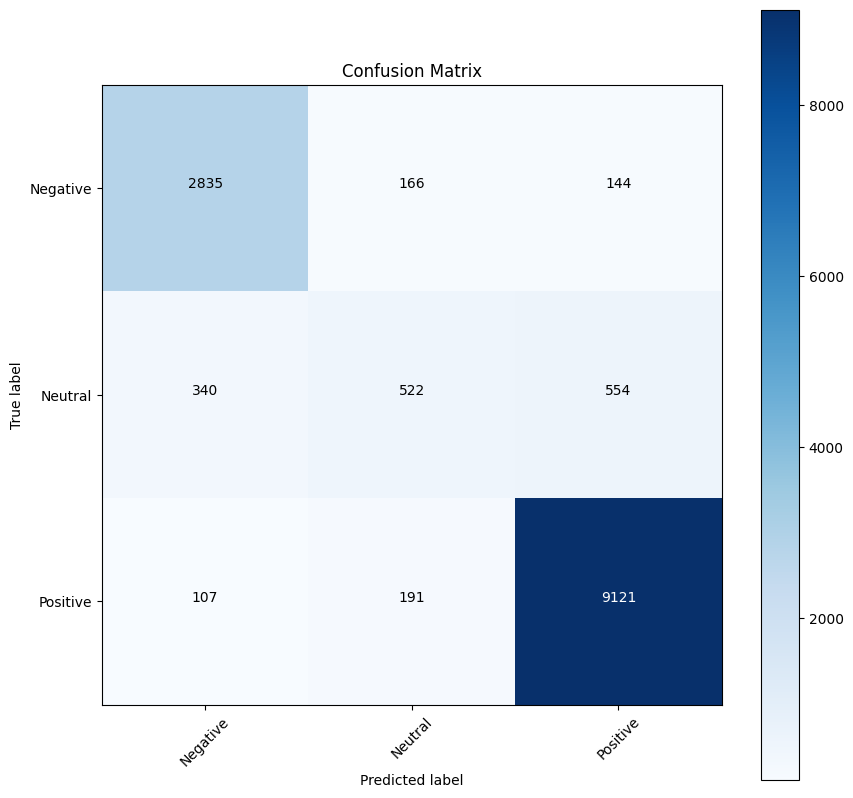

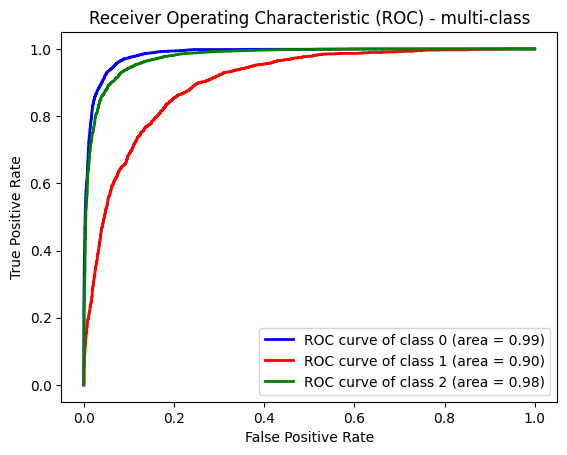

In [ ]:
configs = [
    Config(3e-5, 32,16, 2, 'roberta-gru', unfreeze_layers=12)
]
for config in configs:
    config.pretty_print()
    tester = Tester(preprocessed_test_dataset,config)
    tester.run_test()

## Experiment 3 Analysis: Gradual Unfreezing of Pretrained RoBERTa Layers
Another experiment involved gradually unfreezing the pretrained RoBERTa layers:
- F1 Score: 0.827
- Test Accuracy: 0.81
- AUC Scores: Negative - 0.967, Neutral - 0.835, Positive - 0.952

This strategy led to lower performance metrics, suggesting that gradual unfreezing did not favorably
impact the model’s accuracy for this specific task

Picking Robert-GRU Model


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Preprocessing Dataset...
1. Removing punctuations


100%|██████████| 13980/13980 [00:00<00:00, 43017.37it/s]


2. Converting text to lower case


100%|██████████| 13980/13980 [00:00<00:00, 651117.32it/s]


3. Removing Stop Words
Stopwords already downloaded.


100%|██████████| 13980/13980 [00:02<00:00, 5364.55it/s]


4. Converting to stars to sentiment


100%|██████████| 13980/13980 [00:00<00:00, 871695.93it/s]


5. Enconding sentiments to 0, 1, 2 (Positive, Negative, Neutral)
Preprocessing done!
13980


100%|██████████| 437/437 [00:59<00:00,  7.29it/s]


F1 Score: 0.8273615235834577
Test Accuracy: 0.81
AUC Scores: {'Class 0 AUC': 0.9672681492806904, 'Class 1 AUC': 0.83450577675072, 'Class 2 AUC': 0.9517104713473508}


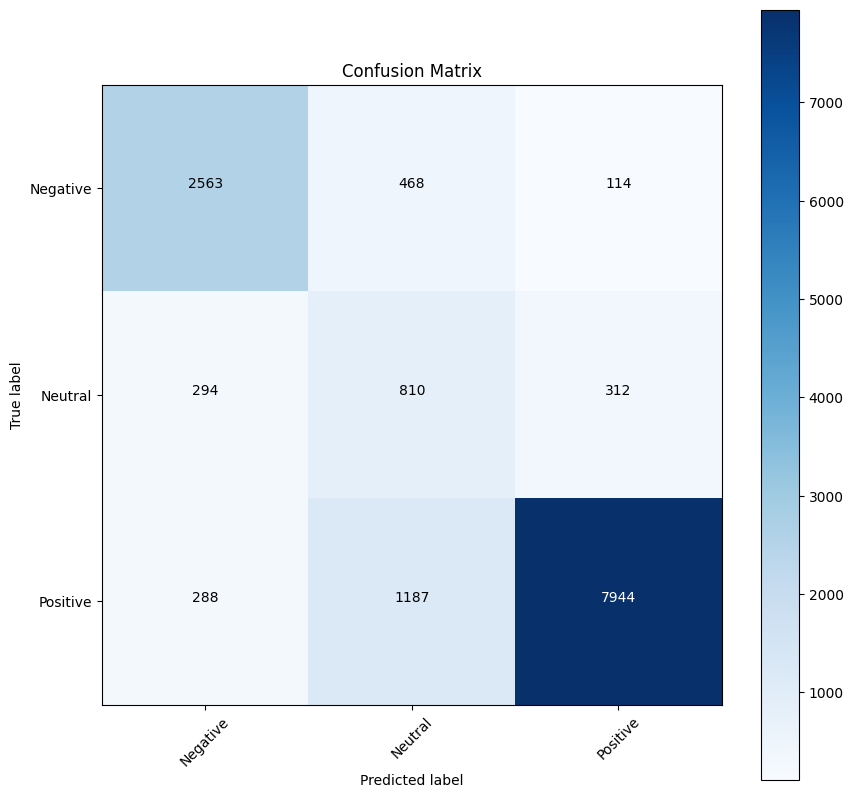

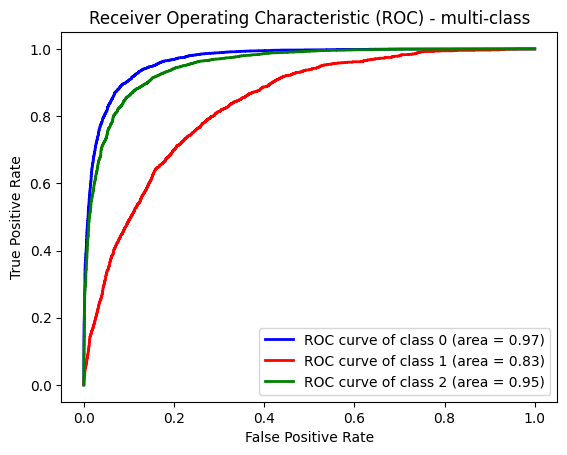

In [ ]:
configs = [
    Config(3e-5, 32,16, 2, 'roberta-gru', unfreeze_layers=[1,2,3,4,5])
]
for config in configs:
    config.pretty_print()
    tester = Tester(preprocessed_test_dataset,config)
    tester.run_test()